In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32/enc_train_32.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32/resp_train_32.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 32), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 32), (48855, 214))

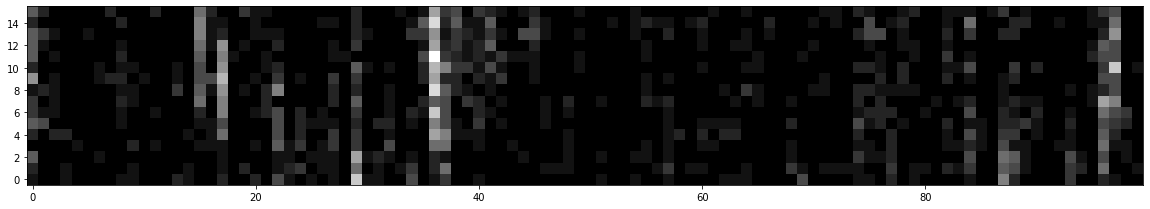

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_32/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 32
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.081905
    2       0    0.079622
    3       0    0.079012
    4       0    0.078534
    5       0    0.077762
    6       0    0.077734
    7       0    0.077650
    8       0    0.077043
    9       0    0.076837
   10       0    0.076620
   11       0    0.076491
   12       0    0.076449
   13       0    0.076411
   14       0    0.076355
   15       0    0.076195
   16       0    0.076112
   17       0    0.076021
   18       0    0.075858
   19       0    0.075782
   20       0    0.075659
   21       0    0.075575
   22       0    0.075531
   23       0    0.075496
   24       0    0.075497
   25       1    0.075500
   26       2    0.075435
   27       0    0.075325
   28       0    0.075228
   29       0    0.075069
   30       0    0.075074
   31       1    0.075092
   32       2    0.075046
   33       0    0.075035
   34       0    0.075033
   35       0    0.074992
   36       0    0.074992
   37       1    0.074989
   38       

   27       4    0.096176
   28       5    0.096236
   29       6    0.096181
   30       7    0.096133
   31       8    0.096104
   32       9    0.095978
   33       0    0.095950
   34       0    0.095918
   35       0    0.095890
   36       0    0.095881
   37       0    0.095926
   38       1    0.095926
   39       2    0.095972
   40       3    0.096075
   41       4    0.096222
   42       5    0.096356
   43       6    0.096546
   44       7    0.096463
   45       8    0.096387
   46       9    0.096341
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107954
    2       0    0.105325
    3       0    0.104291
    4       0    0.102618
    5       0    0.102365
    6       0    0.102063
    7       0    0.101152
    8       0    0.100691
    9       0    0.100279
   10       0    0.099832
   11       0    0.099547
   12       0    0.099443
   13       0    0.099171
   14       0    0.099118
   15       0    0.099021
   16       0    0.098949
   17       

   28       0    0.089658
   29       0    0.089661
   30       1    0.089690
   31       2    0.089718
   32       3    0.089692
   33       4    0.089684
   34       5    0.089669
   35       6    0.089634
   36       0    0.089633
   37       0    0.089639
   38       1    0.089678
   39       2    0.089661
   40       3    0.089630
   41       0    0.089587
   42       0    0.089582
   43       0    0.089607
   44       1    0.089595
   45       2    0.089569
   46       0    0.089533
   47       0    0.089547
   48       1    0.089541
   49       2    0.089539
   50       3    0.089534
   51       4    0.089539
   52       5    0.089533
   53       6    0.089525
   54       0    0.089537
   55       1    0.089539
   56       2    0.089526
   57       3    0.089516
   58       0    0.089528
   59       1    0.089532
   60       2    0.089551
   61       3    0.089534
   62       4    0.089493
   63       0    0.089496
   64       1    0.089503
   65       2    0.089513
   66       

   10       0    0.141218
   11       0    0.141151
   12       0    0.140961
   13       0    0.140721
   14       0    0.140630
   15       0    0.140581
   16       0    0.140594
   17       1    0.140504
   18       0    0.140409
   19       0    0.140405
   20       0    0.140407
   21       1    0.140422
   22       2    0.140329
   23       0    0.140208
   24       0    0.140165
   25       0    0.140178
   26       1    0.140196
   27       2    0.140223
   28       3    0.140185
   29       4    0.140130
   30       0    0.140133
   31       1    0.140150
   32       2    0.140116
   33       0    0.140071
   34       0    0.140043
   35       0    0.140091
   36       1    0.140140
   37       2    0.140164
   38       3    0.140166
   39       4    0.140150
   40       5    0.140152
   41       6    0.140145
   42       7    0.140107
   43       8    0.140087
   44       9    0.140082
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147089
    2       

   38       0    0.055988
   39       0    0.055992
   40       1    0.055988
   41       0    0.055980
   42       0    0.055979
   43       0    0.055994
   44       1    0.055998
   45       2    0.056003
   46       3    0.055978
   47       0    0.055976
   48       0    0.055973
   49       0    0.055967
   50       0    0.055966
   51       0    0.055976
   52       1    0.055984
   53       2    0.055979
   54       3    0.055971
   55       4    0.055961
   56       0    0.055960
   57       0    0.055972
   58       1    0.055986
   59       2    0.055983
   60       3    0.055986
   61       4    0.055997
   62       5    0.055988
   63       6    0.055978
   64       7    0.055981
   65       8    0.055988
   66       9    0.055996
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.060939
    2       0    0.059781
    3       0    0.059409
    4       0    0.058433
    5       0    0.058140
    6       0    0.057927
    7       0    0.057891
    8       

   37       8    0.089642
   38       9    0.089584
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093388
    2       0    0.092006
    3       0    0.091069
    4       0    0.089965
    5       0    0.089470
    6       0    0.089014
    7       0    0.088554
    8       0    0.088421
    9       0    0.087903
   10       0    0.087782
   11       0    0.087608
   12       0    0.087519
   13       0    0.087373
   14       0    0.087337
   15       0    0.087321
   16       0    0.087212
   17       0    0.087212
   18       1    0.087151
   19       0    0.087246
   20       1    0.087246
   21       2    0.087188
   22       3    0.087179
   23       4    0.087110
   24       0    0.087101
   25       0    0.087120
   26       1    0.087103
   27       2    0.087064
   28       0    0.087069
   29       1    0.087071
   30       2    0.087055
   31       0    0.087019
   32       0    0.086973
   33       0    0.086979
   34       1    0.086965
   35       

    9       0    0.090503
   10       0    0.090279
   11       0    0.090239
   12       0    0.090173
   13       0    0.090062
   14       0    0.090054
   15       0    0.089996
   16       0    0.089866
   17       0    0.089851
   18       0    0.089877
   19       1    0.089825
   20       0    0.089774
   21       0    0.089706
   22       0    0.089630
   23       0    0.089586
   24       0    0.089536
   25       0    0.089539
   26       1    0.089510
   27       0    0.089490
   28       0    0.089469
   29       0    0.089431
   30       0    0.089413
   31       0    0.089409
   32       0    0.089383
   33       0    0.089407
   34       1    0.089412
   35       2    0.089372
   36       0    0.089359
   37       0    0.089373
   38       1    0.089385
   39       2    0.089370
   40       3    0.089363
   41       4    0.089370
   42       5    0.089348
   43       0    0.089368
   44       1    0.089389
   45       2    0.089361
   46       3    0.089383
   47       

   37       0    0.244558
   38       0    0.244542
   39       0    0.244566
   40       1    0.244603
   41       2    0.244537
   42       0    0.244535
   43       0    0.244569
   44       1    0.244515
   45       0    0.244482
   46       0    0.244472
   47       0    0.244484
   48       1    0.244503
   49       2    0.244449
   50       0    0.244416
   51       0    0.244461
   52       1    0.244467
   53       2    0.244397
   54       0    0.244394
   55       0    0.244410
   56       1    0.244421
   57       2    0.244371
   58       0    0.244380
   59       1    0.244402
   60       2    0.244359
   61       0    0.244350
   62       0    0.244347
   63       0    0.244357
   64       1    0.244376
   65       2    0.244376
   66       3    0.244362
   67       4    0.244368
   68       5    0.244335
   69       0    0.244292
   70       0    0.244315
   71       1    0.244355
   72       2    0.244362
   73       3    0.244374
   74       4    0.244252
   75       

   69       8    0.083667
   70       9    0.083657
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093553
    2       0    0.090170
    3       0    0.089315
    4       0    0.089407
    5       1    0.088565
    6       0    0.088102
    7       0    0.087471
    8       0    0.087205
    9       0    0.087021
   10       0    0.086856
   11       0    0.086872
   12       1    0.086652
   13       0    0.086511
   14       0    0.086328
   15       0    0.086224
   16       0    0.085927
   17       0    0.085725
   18       0    0.085723
   19       0    0.085642
   20       0    0.085595
   21       0    0.085620
   22       1    0.085625
   23       2    0.085554
   24       0    0.085593
   25       1    0.085537
   26       0    0.085490
   27       0    0.085450
   28       0    0.085415
   29       0    0.085311
   30       0    0.085292
   31       0    0.085261
   32       0    0.085223
   33       0    0.085260
   34       1    0.085313
   35       

   41       4    0.020933
   42       5    0.020941
   43       6    0.020923
   44       7    0.020922
   45       8    0.020920
   46       9    0.020920
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.023608
    2       0    0.022911
    3       0    0.022483
    4       0    0.022203
    5       0    0.022238
    6       1    0.022172
    7       0    0.022078
    8       0    0.022125
    9       1    0.022169
   10       2    0.022115
   11       3    0.022089
   12       4    0.021988
   13       0    0.021941
   14       0    0.021935
   15       0    0.021886
   16       0    0.021873
   17       0    0.021890
   18       1    0.021821
   19       0    0.021809
   20       0    0.021719
   21       0    0.021786
   22       1    0.021837
   23       2    0.021794
   24       3    0.021803
   25       4    0.021788
   26       5    0.021775
   27       6    0.021820
   28       7    0.021809
   29       8    0.021843
   30       9    0.021866
minimum of t

    2       0    0.540335
    3       0    0.539468
    4       0    0.539058
    5       0    0.538412
    6       0    0.538187
    7       0    0.538038
    8       0    0.537696
    9       0    0.537566
   10       0    0.537320
   11       0    0.537177
   12       0    0.537137
   13       0    0.537117
   14       0    0.537071
   15       0    0.536981
   16       0    0.536971
   17       0    0.536927
   18       0    0.536782
   19       0    0.536753
   20       0    0.536743
   21       0    0.536670
   22       0    0.536605
   23       0    0.536625
   24       1    0.536620
   25       2    0.536579
   26       0    0.536576
   27       0    0.536591
   28       1    0.536597
   29       2    0.536595
   30       3    0.536624
   31       4    0.536622
   32       5    0.536597
   33       6    0.536595
   34       7    0.536576
   35       0    0.536516
   36       0    0.536492
   37       0    0.536513
   38       1    0.536512
   39       2    0.536501
   40       

    4       0    0.524047
    5       0    0.522900
    6       0    0.522576
    7       0    0.522250
    8       0    0.521813
    9       0    0.521654
   10       0    0.521398
   11       0    0.521250
   12       0    0.521015
   13       0    0.520925
   14       0    0.520786
   15       0    0.520581
   16       0    0.520463
   17       0    0.520299
   18       0    0.520111
   19       0    0.520117
   20       1    0.520129
   21       2    0.519997
   22       0    0.519926
   23       0    0.519938
   24       1    0.519914
   25       0    0.519858
   26       0    0.519865
   27       1    0.519889
   28       2    0.519902
   29       3    0.519933
   30       4    0.519930
   31       5    0.519915
   32       6    0.519816
   33       0    0.519766
   34       0    0.519763
   35       0    0.519745
   36       0    0.519723
   37       0    0.519714
   38       0    0.519708
   39       0    0.519693
   40       0    0.519692
   41       0    0.519694
   42       

   36       1    0.114345
   37       2    0.114186
   38       3    0.114199
   39       4    0.114212
   40       5    0.114206
   41       6    0.114212
   42       7    0.114218
   43       8    0.114217
   44       9    0.114200
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120030
    2       0    0.118153
    3       0    0.115399
    4       0    0.114692
    5       0    0.114403
    6       0    0.114091
    7       0    0.113771
    8       0    0.113671
    9       0    0.113606
   10       0    0.113499
   11       0    0.113418
   12       0    0.113077
   13       0    0.112905
   14       0    0.112873
   15       0    0.112897
   16       1    0.112846
   17       0    0.112663
   18       0    0.112630
   19       0    0.112670
   20       1    0.112725
   21       2    0.112542
   22       0    0.112447
   23       0    0.112512
   24       1    0.112517
   25       2    0.112475
   26       3    0.112464
   27       4    0.112506
   28       

   21       0    0.378884
   22       0    0.378880
   23       0    0.378800
   24       0    0.378747
   25       0    0.378733
   26       0    0.378700
   27       0    0.378671
   28       0    0.378679
   29       1    0.378658
   30       0    0.378655
   31       0    0.378696
   32       1    0.378734
   33       2    0.378687
   34       3    0.378627
   35       0    0.378621
   36       0    0.378586
   37       0    0.378579
   38       0    0.378588
   39       1    0.378570
   40       0    0.378575
   41       1    0.378621
   42       2    0.378634
   43       3    0.378604
   44       4    0.378609
   45       5    0.378619
   46       6    0.378610
   47       7    0.378631
   48       8    0.378637
   49       9    0.378609
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.382404
    2       0    0.381245
    3       0    0.381378
    4       1    0.380086
    5       0    0.378968
    6       0    0.378869
    7       0    0.378382
    8       

   51       0    0.180338
   52       0    0.180350
   53       1    0.180336
   54       0    0.180318
   55       0    0.180302
   56       0    0.180304
   57       1    0.180306
   58       2    0.180315
   59       3    0.180318
   60       4    0.180307
   61       5    0.180312
   62       6    0.180332
   63       7    0.180334
   64       8    0.180322
   65       9    0.180330
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.188821
    2       0    0.187357
    3       0    0.186118
    4       0    0.185625
    5       0    0.185186
    6       0    0.184313
    7       0    0.184216
    8       0    0.183503
    9       0    0.183214
   10       0    0.183074
   11       0    0.182726
   12       0    0.182515
   13       0    0.182385
   14       0    0.182202
   15       0    0.182161
   16       0    0.182065
   17       0    0.181624
   18       0    0.181571
   19       0    0.181518
   20       0    0.181465
   21       0    0.181438
   22       

   31       5    0.099995
   32       6    0.099971
   33       7    0.099975
   34       8    0.099920
   35       9    0.099904
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.041429
    2       0    0.040155
    3       0    0.039415
    4       0    0.038782
    5       0    0.038044
    6       0    0.038166
    7       1    0.038127
    8       2    0.038320
    9       3    0.038348
   10       4    0.037873
   11       0    0.037969
   12       1    0.038074
   13       2    0.038022
   14       3    0.038001
   15       4    0.038192
   16       5    0.037992
   17       6    0.038180
   18       7    0.038699
   19       8    0.039380
   20       9    0.039144
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.041759
    2       0    0.041021
    3       0    0.040342
    4       0    0.038797
    5       0    0.038129
    6       0    0.037984
    7       0    0.037696
    8       0    0.037387
    9       0    0.037519
   10       

   64       0    0.524555
   65       1    0.524526
   66       0    0.524514
   67       0    0.524513
   68       0    0.524503
   69       0    0.524505
   70       1    0.524486
   71       0    0.524469
   72       0    0.524464
   73       0    0.524454
   74       0    0.524459
   75       1    0.524469
   76       2    0.524489
   77       3    0.524500
   78       4    0.524490
   79       5    0.524482
   80       6    0.524484
   81       7    0.524480
   82       8    0.524479
   83       9    0.524468
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.543270
    2       0    0.540396
    3       0    0.538375
    4       0    0.535858
    5       0    0.535025
    6       0    0.534303
    7       0    0.532956
    8       0    0.531433
    9       0    0.530796
   10       0    0.529931
   11       0    0.529576
   12       0    0.529452
   13       0    0.529070
   14       0    0.528582
   15       0    0.528395
   16       0    0.528163
   17       

   56       0    0.097122
   57       0    0.097117
   58       0    0.097119
   59       1    0.097122
   60       2    0.097116
   61       0    0.097112
   62       0    0.097113
   63       1    0.097097
   64       0    0.097089
   65       0    0.097097
   66       1    0.097085
   67       0    0.097065
   68       0    0.097063
   69       0    0.097065
   70       1    0.097057
   71       0    0.097055
   72       0    0.097055
   73       1    0.097056
   74       2    0.097056
   75       3    0.097062
   76       4    0.097061
   77       5    0.097060
   78       6    0.097060
   79       7    0.097056
   80       8    0.097051
   81       0    0.097051
   82       1    0.097054
   83       2    0.097058
   84       3    0.097057
   85       4    0.097055
   86       5    0.097054
   87       6    0.097052
   88       7    0.097053
   89       8    0.097054
   90       9    0.097053
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100760
    2       

   12       1    0.028015
   13       2    0.027939
   14       0    0.027927
   15       0    0.027844
   16       0    0.027804
   17       0    0.027824
   18       1    0.027612
   19       0    0.027610
   20       0    0.027608
   21       0    0.027579
   22       0    0.027594
   23       1    0.027546
   24       0    0.027508
   25       0    0.027509
   26       1    0.027533
   27       2    0.027531
   28       3    0.027572
   29       4    0.027548
   30       5    0.027579
   31       6    0.027579
   32       7    0.027563
   33       8    0.027583
   34       9    0.027572
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.029185
    2       0    0.028505
    3       0    0.028001
    4       0    0.027812
    5       0    0.027561
    6       0    0.027417
    7       0    0.027372
    8       0    0.027311
    9       0    0.027156
   10       0    0.027126
   11       0    0.027027
   12       0    0.026868
   13       0    0.026841
   14       

   27       1    0.216807
   28       0    0.216723
   29       0    0.216691
   30       0    0.216708
   31       1    0.216649
   32       0    0.216649
   33       0    0.216592
   34       0    0.216619
   35       1    0.216599
   36       2    0.216604
   37       3    0.216534
   38       0    0.216552
   39       1    0.216478
   40       0    0.216512
   41       1    0.216490
   42       2    0.216468
   43       0    0.216393
   44       0    0.216409
   45       1    0.216427
   46       2    0.216403
   47       3    0.216417
   48       4    0.216422
   49       5    0.216403
   50       6    0.216433
   51       7    0.216450
   52       8    0.216430
   53       9    0.216463
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.042393
    2       0    0.041569
    3       0    0.041473
    4       0    0.041545
    5       1    0.041327
    6       0    0.040879
    7       0    0.041001
    8       1    0.040942
    9       2    0.040755
   10       

   39       2    0.183882
   40       3    0.183865
   41       4    0.183900
   42       5    0.183945
   43       6    0.183930
   44       7    0.183937
   45       8    0.183955
   46       9    0.183935
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.192178
    2       0    0.191208
    3       0    0.189928
    4       0    0.189497
    5       0    0.188607
    6       0    0.188080
    7       0    0.188167
    8       1    0.188140
    9       2    0.187702
   10       0    0.187582
   11       0    0.187515
   12       0    0.187415
   13       0    0.187418
   14       1    0.187263
   15       0    0.187138
   16       0    0.187153
   17       1    0.187163
   18       2    0.187008
   19       0    0.186865
   20       0    0.186794
   21       0    0.186785
   22       0    0.186721
   23       0    0.186724
   24       1    0.186798
   25       2    0.186739
   26       3    0.186565
   27       0    0.186544
   28       0    0.186561
   29       

    1       0    0.323856
    2       0    0.319603
    3       0    0.318344
    4       0    0.316978
    5       0    0.315780
    6       0    0.315003
    7       0    0.314323
    8       0    0.314012
    9       0    0.313117
   10       0    0.312474
   11       0    0.312273
   12       0    0.311915
   13       0    0.311911
   14       0    0.311737
   15       0    0.311788
   16       1    0.311660
   17       0    0.311355
   18       0    0.311227
   19       0    0.311122
   20       0    0.310839
   21       0    0.310554
   22       0    0.310653
   23       1    0.310339
   24       0    0.310492
   25       1    0.310529
   26       2    0.310266
   27       0    0.310255
   28       0    0.310174
   29       0    0.310099
   30       0    0.309992
   31       0    0.309922
   32       0    0.310014
   33       1    0.310053
   34       2    0.309937
   35       3    0.309900
   36       0    0.309915
   37       1    0.309844
   38       0    0.309798
   39       

Iters   tally   ll(test) 
    1       0    0.093548
    2       0    0.093210
    3       0    0.093205
    4       0    0.092293
    5       0    0.091824
    6       0    0.091537
    7       0    0.091326
    8       0    0.091323
    9       0    0.091422
   10       1    0.091133
   11       0    0.091095
   12       0    0.090911
   13       0    0.090906
   14       0    0.090878
   15       0    0.090910
   16       1    0.090873
   17       0    0.090837
   18       0    0.090897
   19       1    0.090964
   20       2    0.090830
   21       0    0.090778
   22       0    0.090731
   23       0    0.090758
   24       1    0.090823
   25       2    0.090769
   26       3    0.090740
   27       4    0.090775
   28       5    0.090790
   29       6    0.090734
   30       7    0.090719
   31       0    0.090764
   32       1    0.090667
   33       0    0.090604
   34       0    0.090641
   35       1    0.090710
   36       2    0.090676
   37       3    0.090670
   38       

   41       5    0.080522
   42       6    0.080550
   43       7    0.080582
   44       8    0.080599
   45       9    0.080593
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093891
    2       0    0.090796
    3       0    0.090331
    4       0    0.089260
    5       0    0.088636
    6       0    0.088544
    7       0    0.087767
    8       0    0.087961
    9       1    0.087520
   10       0    0.087664
   11       1    0.087369
   12       0    0.087583
   13       1    0.087304
   14       0    0.087049
   15       0    0.087366
   16       1    0.087212
   17       2    0.086943
   18       0    0.086968
   19       1    0.087115
   20       2    0.086975
   21       3    0.087094
   22       4    0.086933
   23       0    0.087229
   24       1    0.086979
   25       2    0.086718
   26       0    0.086774
   27       1    0.086900
   28       2    0.086838
   29       3    0.086969
   30       4    0.087069
   31       5    0.086879
   32       

   51       2    0.163535
   52       3    0.163542
   53       4    0.163578
   54       5    0.163449
   55       6    0.163453
   56       7    0.163504
   57       8    0.163434
   58       9    0.163421
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179065
    2       0    0.174750
    3       0    0.171639
    4       0    0.170766
    5       0    0.169767
    6       0    0.168988
    7       0    0.168223
    8       0    0.167250
    9       0    0.166568
   10       0    0.165735
   11       0    0.165137
   12       0    0.164939
   13       0    0.164886
   14       0    0.164715
   15       0    0.164527
   16       0    0.164399
   17       0    0.164173
   18       0    0.164194
   19       1    0.163907
   20       0    0.163570
   21       0    0.163503
   22       0    0.163465
   23       0    0.163403
   24       0    0.163347
   25       0    0.163331
   26       0    0.163342
   27       1    0.163272
   28       0    0.163185
   29       

   31       0    0.501851
   32       0    0.501768
   33       0    0.501738
   34       0    0.501735
   35       0    0.501731
   36       0    0.501701
   37       0    0.501682
   38       0    0.501681
   39       0    0.501698
   40       1    0.501672
   41       0    0.501663
   42       0    0.501656
   43       0    0.501644
   44       0    0.501631
   45       0    0.501625
   46       0    0.501631
   47       1    0.501646
   48       2    0.501636
   49       3    0.501623
   50       0    0.501621
   51       0    0.501633
   52       1    0.501642
   53       2    0.501630
   54       3    0.501616
   55       0    0.501599
   56       0    0.501592
   57       0    0.501651
   58       1    0.501667
   59       2    0.501640
   60       3    0.501605
   61       4    0.501582
   62       0    0.501575
   63       0    0.501580
   64       1    0.501594
   65       2    0.501602
   66       3    0.501614
   67       4    0.501608
   68       5    0.501600
   69       

    5       0    0.119903
    6       1    0.119599
    7       0    0.119364
    8       0    0.119261
    9       0    0.119076
   10       0    0.119029
   11       0    0.119049
   12       1    0.118988
   13       0    0.118960
   14       0    0.118963
   15       1    0.118952
   16       0    0.118873
   17       0    0.118871
   18       0    0.118867
   19       0    0.119027
   20       1    0.119184
   21       2    0.119256
   22       3    0.119251
   23       4    0.119160
   24       5    0.119109
   25       6    0.119067
   26       7    0.119057
   27       8    0.119067
   28       9    0.119055
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120361
    2       0    0.119705
    3       0    0.119412
    4       0    0.119060
    5       0    0.118731
    6       0    0.118655
    7       0    0.118575
    8       0    0.118510
    9       0    0.118341
   10       0    0.118193
   11       0    0.118189
   12       0    0.118185
   13       

    3       0    0.085830
    4       0    0.085467
    5       0    0.085455
    6       0    0.084946
    7       0    0.084816
    8       0    0.084712
    9       0    0.084690
   10       0    0.084457
   11       0    0.084400
   12       0    0.084397
   13       0    0.084384
   14       0    0.084266
   15       0    0.084194
   16       0    0.084129
   17       0    0.084124
   18       0    0.084119
   19       0    0.084091
   20       0    0.084072
   21       0    0.084107
   22       1    0.084076
   23       2    0.084132
   24       3    0.084185
   25       4    0.084203
   26       5    0.084245
   27       6    0.084232
   28       7    0.084207
   29       8    0.084196
   30       9    0.084201
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.628988
    2       0    0.626551
    3       0    0.625811
    4       0    0.625044
    5       0    0.624421
    6       0    0.623925
    7       0    0.623469
    8       0    0.623217
    9       

   27       0    0.621868
   28       0    0.621837
   29       0    0.621783
   30       0    0.621761
   31       0    0.621743
   32       0    0.621739
   33       0    0.621745
   34       1    0.621732
   35       0    0.621704
   36       0    0.621688
   37       0    0.621663
   38       0    0.621660
   39       0    0.621679
   40       1    0.621680
   41       2    0.621661
   42       3    0.621644
   43       0    0.621633
   44       0    0.621636
   45       1    0.621643
   46       2    0.621652
   47       3    0.621627
   48       0    0.621576
   49       0    0.621571
   50       0    0.621563
   51       0    0.621544
   52       0    0.621549
   53       1    0.621542
   54       0    0.621524
   55       0    0.621517
   56       0    0.621514
   57       0    0.621511
   58       0    0.621511
   59       0    0.621512
   60       1    0.621510
   61       0    0.621512
   62       1    0.621502
   63       0    0.621493
   64       0    0.621493
   65       

   29       1    0.518691
   30       0    0.518652
   31       0    0.518615
   32       0    0.518623
   33       1    0.518626
   34       2    0.518584
   35       0    0.518534
   36       0    0.518556
   37       1    0.518566
   38       2    0.518573
   39       3    0.518536
   40       4    0.518500
   41       0    0.518478
   42       0    0.518427
   43       0    0.518386
   44       0    0.518383
   45       0    0.518381
   46       0    0.518379
   47       0    0.518375
   48       0    0.518368
   49       0    0.518356
   50       0    0.518351
   51       0    0.518327
   52       0    0.518299
   53       0    0.518293
   54       0    0.518295
   55       1    0.518300
   56       2    0.518299
   57       3    0.518279
   58       0    0.518275
   59       0    0.518284
   60       1    0.518287
   61       2    0.518284
   62       3    0.518275
   63       0    0.518290
   64       1    0.518297
   65       2    0.518290
   66       3    0.518273
   67       

   41       0    0.518193
   42       1    0.518181
   43       0    0.518170
   44       0    0.518190
   45       1    0.518180
   46       2    0.518158
   47       0    0.518188
   48       1    0.518198
   49       2    0.518189
   50       3    0.518185
   51       4    0.518163
   52       5    0.518147
   53       0    0.518093
   54       0    0.518061
   55       0    0.518051
   56       0    0.518047
   57       0    0.518067
   58       1    0.518077
   59       2    0.518066
   60       3    0.518073
   61       4    0.518060
   62       5    0.518056
   63       6    0.518063
   64       7    0.518062
   65       8    0.518084
   66       9    0.518113
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.153087
    2       0    0.150565
    3       0    0.149845
    4       0    0.148358
    5       0    0.147211
    6       0    0.145797
    7       0    0.145576
    8       0    0.145308
    9       0    0.144210
   10       0    0.143855
   11       

   94       8    0.135436
   95       9    0.135435
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.103957
    2       0    0.102906
    3       0    0.102211
    4       0    0.101288
    5       0    0.101099
    6       0    0.100749
    7       0    0.099780
    8       0    0.099294
    9       0    0.099205
   10       0    0.099090
   11       0    0.098892
   12       0    0.098847
   13       0    0.098943
   14       1    0.098934
   15       2    0.098787
   16       0    0.098466
   17       0    0.098312
   18       0    0.098315
   19       1    0.098148
   20       0    0.098195
   21       1    0.098240
   22       2    0.098232
   23       3    0.098169
   24       4    0.098141
   25       0    0.098102
   26       0    0.098154
   27       1    0.098141
   28       2    0.098002
   29       0    0.097904
   30       0    0.097796
   31       0    0.097893
   32       1    0.097973
   33       2    0.097841
   34       3    0.097765
   35       

   13       0    0.106856
   14       0    0.106767
   15       0    0.106717
   16       0    0.106680
   17       0    0.106676
   18       0    0.106457
   19       0    0.106415
   20       0    0.106385
   21       0    0.106376
   22       0    0.106364
   23       0    0.106329
   24       0    0.106306
   25       0    0.106277
   26       0    0.106269
   27       0    0.106268
   28       0    0.106234
   29       0    0.106209
   30       0    0.106202
   31       0    0.106184
   32       0    0.106159
   33       0    0.106155
   34       0    0.106128
   35       0    0.106090
   36       0    0.106081
   37       0    0.106073
   38       0    0.106085
   39       1    0.106096
   40       2    0.106085
   41       3    0.106086
   42       4    0.106079
   43       5    0.106070
   44       0    0.106071
   45       1    0.106066
   46       0    0.106079
   47       1    0.106082
   48       2    0.106004
   49       0    0.105984
   50       0    0.106022
   51       

    9       0    0.090204
   10       0    0.090122
   11       0    0.090028
   12       0    0.090006
   13       0    0.089895
   14       0    0.089829
   15       0    0.089701
   16       0    0.089566
   17       0    0.089552
   18       0    0.089568
   19       1    0.089686
   20       2    0.089671
   21       3    0.089538
   22       0    0.089450
   23       0    0.089475
   24       1    0.089432
   25       0    0.089386
   26       0    0.089391
   27       1    0.089429
   28       2    0.089409
   29       3    0.089424
   30       4    0.089385
   31       0    0.089352
   32       0    0.089317
   33       0    0.089335
   34       1    0.089355
   35       2    0.089346
   36       3    0.089428
   37       4    0.089443
   38       5    0.089511
   39       6    0.089479
   40       7    0.089528
   41       8    0.089533
   42       9    0.089588
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.096111
    2       0    0.093928
    3       

   41       6    0.368346
   42       0    0.368346
   43       1    0.368337
   44       0    0.368313
   45       0    0.368319
   46       1    0.368314
   47       2    0.368294
   48       0    0.368294
   49       1    0.368287
   50       0    0.368277
   51       0    0.368283
   52       1    0.368276
   53       0    0.368277
   54       1    0.368247
   55       0    0.368230
   56       0    0.368235
   57       1    0.368241
   58       2    0.368231
   59       3    0.368211
   60       0    0.368220
   61       1    0.368222
   62       2    0.368217
   63       3    0.368208
   64       0    0.368216
   65       1    0.368216
   66       2    0.368207
   67       0    0.368200
   68       0    0.368199
   69       0    0.368185
   70       0    0.368173
   71       0    0.368179
   72       1    0.368174
   73       2    0.368161
   74       0    0.368165
   75       1    0.368164
   76       2    0.368158
   77       0    0.368166
   78       1    0.368164
   79       

   72       0    0.371816
   73       0    0.371813
   74       0    0.371804
   75       0    0.371790
   76       0    0.371785
   77       0    0.371781
   78       0    0.371776
   79       0    0.371776
   80       0    0.371773
   81       0    0.371767
   82       0    0.371762
   83       0    0.371759
   84       0    0.371757
   85       0    0.371756
   86       0    0.371757
   87       1    0.371757
   88       2    0.371760
   89       3    0.371764
   90       4    0.371766
   91       5    0.371764
   92       6    0.371765
   93       7    0.371765
   94       8    0.371761
   95       9    0.371756
   96       0    0.371755
   97       0    0.371756
   98       1    0.371757
   99       2    0.371751
  100       0    0.371742
  101       0    0.371735
  102       0    0.371734
  103       0    0.371735
  104       1    0.371734
  105       0    0.371733
  106       0    0.371731
  107       0    0.371731
  108       1    0.371739
  109       2    0.371746
  110       

    7       0    0.577136
    8       0    0.576911
    9       0    0.576216
   10       0    0.575997
   11       0    0.575989
   12       0    0.575533
   13       0    0.575143
   14       0    0.575018
   15       0    0.574810
   16       0    0.574689
   17       0    0.574698
   18       1    0.574679
   19       0    0.574530
   20       0    0.574377
   21       0    0.574305
   22       0    0.574242
   23       0    0.574220
   24       0    0.574193
   25       0    0.574160
   26       0    0.574061
   27       0    0.573963
   28       0    0.573921
   29       0    0.573854
   30       0    0.573860
   31       1    0.573830
   32       0    0.573813
   33       0    0.573804
   34       0    0.573813
   35       1    0.573784
   36       0    0.573833
   37       1    0.573816
   38       2    0.573809
   39       3    0.573758
   40       0    0.573714
   41       0    0.573698
   42       0    0.573667
   43       0    0.573673
   44       1    0.573652
   45       

   34       0    0.098089
   35       0    0.098086
   36       0    0.098077
   37       0    0.098089
   38       1    0.098112
   39       2    0.098111
   40       3    0.098102
   41       4    0.098092
   42       5    0.098093
   43       6    0.098078
   44       7    0.098052
   45       0    0.098036
   46       0    0.098045
   47       1    0.098027
   48       0    0.098034
   49       1    0.098027
   50       0    0.098037
   51       1    0.098029
   52       2    0.098013
   53       0    0.098021
   54       1    0.098016
   55       2    0.098028
   56       3    0.098030
   57       4    0.098023
   58       5    0.098027
   59       6    0.098030
   60       7    0.098029
   61       8    0.098031
   62       9    0.098029
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104089
    2       0    0.103245
    3       0    0.101466
    4       0    0.100976
    5       0    0.100410
    6       0    0.100188
    7       0    0.099862
    8       

   22       0    0.466995
   23       0    0.466557
   24       0    0.466440
   25       0    0.466476
   26       1    0.466365
   27       0    0.466004
   28       0    0.465924
   29       0    0.465941
   30       1    0.465851
   31       0    0.465791
   32       0    0.465829
   33       1    0.465849
   34       2    0.465670
   35       0    0.465575
   36       0    0.465624
   37       1    0.465588
   38       2    0.465454
   39       0    0.465434
   40       0    0.465462
   41       1    0.465466
   42       2    0.465385
   43       0    0.465389
   44       1    0.465398
   45       2    0.465351
   46       0    0.465335
   47       0    0.465362
   48       1    0.465360
   49       2    0.465326
   50       0    0.465314
   51       0    0.465260
   52       0    0.465229
   53       0    0.465280
   54       1    0.465323
   55       2    0.465215
   56       0    0.465120
   57       0    0.465145
   58       1    0.465161
   59       2    0.465141
   60       

    2       0    0.323821
    3       0    0.321549
    4       0    0.320584
    5       0    0.320197
    6       0    0.319688
    7       0    0.318759
    8       0    0.317721
    9       0    0.317391
   10       0    0.317156
   11       0    0.317025
   12       0    0.316688
   13       0    0.316494
   14       0    0.316296
   15       0    0.316267
   16       0    0.316201
   17       0    0.316014
   18       0    0.315845
   19       0    0.315876
   20       1    0.315957
   21       2    0.315630
   22       0    0.315527
   23       0    0.315409
   24       0    0.315399
   25       0    0.315442
   26       1    0.315355
   27       0    0.315201
   28       0    0.315133
   29       0    0.315100
   30       0    0.315173
   31       1    0.315096
   32       0    0.314788
   33       0    0.314768
   34       0    0.314768
   35       1    0.314800
   36       2    0.314828
   37       3    0.314796
   38       4    0.314768
   39       0    0.314721
   40       

   57       5    0.087816
   58       6    0.087822
   59       7    0.087772
   60       8    0.087754
   61       9    0.087735
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097112
    2       0    0.093160
    3       0    0.092050
    4       0    0.090115
    5       0    0.089063
    6       0    0.088890
    7       0    0.088500
    8       0    0.087113
    9       0    0.086300
   10       0    0.086030
   11       0    0.085972
   12       0    0.085878
   13       0    0.085547
   14       0    0.085463
   15       0    0.085096
   16       0    0.084892
   17       0    0.084663
   18       0    0.084550
   19       0    0.084321
   20       0    0.084315
   21       0    0.084304
   22       0    0.084207
   23       0    0.084092
   24       0    0.084075
   25       0    0.083945
   26       0    0.083848
   27       0    0.083873
   28       1    0.083825
   29       0    0.083753
   30       0    0.083703
   31       0    0.083725
   32       

   47       4    0.024668
   48       5    0.024691
   49       6    0.024693
   50       7    0.024671
   51       8    0.024650
   52       9    0.024614
   53       0    0.024596
   54       0    0.024608
   55       1    0.024615
   56       2    0.024623
   57       3    0.024604
   58       4    0.024613
   59       5    0.024618
   60       6    0.024626
   61       7    0.024620
   62       8    0.024619
   63       9    0.024613
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.028437
    2       0    0.025569
    3       0    0.025140
    4       0    0.024547
    5       0    0.024419
    6       0    0.024130
    7       0    0.024083
    8       0    0.023939
    9       0    0.023762
   10       0    0.023552
   11       0    0.023492
   12       0    0.023478
   13       0    0.023417
   14       0    0.023378
   15       0    0.023293
   16       0    0.023279
   17       0    0.023144
   18       0    0.023032
   19       0    0.023005
   20       

   32       0    0.434464
   33       0    0.434375
   34       0    0.434319
   35       0    0.434287
   36       0    0.434236
   37       0    0.434170
   38       0    0.433996
   39       0    0.433892
   40       0    0.434021
   41       1    0.433991
   42       2    0.433851
   43       0    0.433790
   44       0    0.433742
   45       0    0.433781
   46       1    0.433757
   47       2    0.433662
   48       0    0.433542
   49       0    0.433549
   50       1    0.433602
   51       2    0.433543
   52       3    0.433523
   53       0    0.433488
   54       0    0.433457
   55       0    0.433475
   56       1    0.433480
   57       2    0.433456
   58       0    0.433456
   59       0    0.433473
   60       1    0.433466
   61       2    0.433458
   62       3    0.433470
   63       4    0.433454
   64       0    0.433404
   65       0    0.433387
   66       0    0.433419
   67       1    0.433438
   68       2    0.433423
   69       3    0.433429
   70       

   60       0    0.428687
   61       0    0.428742
   62       1    0.428727
   63       2    0.428592
   64       0    0.428597
   65       1    0.428597
   66       2    0.428648
   67       3    0.428614
   68       4    0.428594
   69       5    0.428612
   70       6    0.428595
   71       7    0.428588
   72       0    0.428594
   73       1    0.428589
   74       2    0.428580
   75       0    0.428585
   76       1    0.428569
   77       0    0.428536
   78       0    0.428541
   79       1    0.428538
   80       2    0.428495
   81       0    0.428483
   82       0    0.428499
   83       1    0.428504
   84       2    0.428487
   85       3    0.428479
   86       0    0.428494
   87       1    0.428497
   88       2    0.428489
   89       3    0.428477
   90       0    0.428472
   91       0    0.428469
   92       0    0.428478
   93       1    0.428480
   94       2    0.428462
   95       0    0.428465
   96       1    0.428442
   97       0    0.428430
   98       

   39       1    0.245815
   40       2    0.245796
   41       0    0.245771
   42       0    0.245765
   43       0    0.245773
   44       1    0.245770
   45       2    0.245767
   46       3    0.245757
   47       0    0.245734
   48       0    0.245706
   49       0    0.245698
   50       0    0.245698
   51       1    0.245695
   52       0    0.245687
   53       0    0.245686
   54       0    0.245675
   55       0    0.245665
   56       0    0.245654
   57       0    0.245651
   58       0    0.245651
   59       0    0.245650
   60       0    0.245649
   61       0    0.245660
   62       1    0.245663
   63       2    0.245646
   64       0    0.245628
   65       0    0.245613
   66       0    0.245615
   67       1    0.245613
   68       2    0.245609
   69       0    0.245599
   70       0    0.245598
   71       0    0.245599
   72       1    0.245597
   73       0    0.245599
   74       1    0.245606
   75       2    0.245612
   76       3    0.245622
   77       

   10       0    0.058628
   11       1    0.058627
   12       2    0.058440
   13       0    0.058320
   14       0    0.058320
   15       1    0.058404
   16       2    0.058320
   17       0    0.058162
   18       0    0.058201
   19       1    0.058177
   20       2    0.058089
   21       0    0.057990
   22       0    0.058194
   23       1    0.058191
   24       2    0.058035
   25       3    0.057987
   26       0    0.058134
   27       1    0.058120
   28       2    0.058019
   29       3    0.057984
   30       0    0.058179
   31       1    0.058213
   32       2    0.058037
   33       3    0.058035
   34       4    0.058119
   35       5    0.058111
   36       6    0.058046
   37       7    0.058075
   38       8    0.058029
   39       9    0.058076
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.262495
    2       0    0.261603
    3       0    0.258875
    4       0    0.258256
    5       0    0.257973
    6       0    0.257520
    7       

   64       0    0.254000
   65       0    0.253976
   66       0    0.253968
   67       0    0.253964
   68       0    0.253963
   69       0    0.253962
   70       0    0.253961
   71       0    0.253962
   72       1    0.253965
   73       2    0.253968
   74       3    0.253969
   75       4    0.253973
   76       5    0.253983
   77       6    0.253995
   78       7    0.253992
   79       8    0.253992
   80       9    0.253994
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.623340
    2       0    0.621393
    3       0    0.620230
    4       0    0.619362
    5       0    0.618998
    6       0    0.618114
    7       0    0.617882
    8       0    0.617658
    9       0    0.617342
   10       0    0.616919
   11       0    0.616732
   12       0    0.616633
   13       0    0.616629
   14       0    0.616550
   15       0    0.616447
   16       0    0.616313
   17       0    0.616241
   18       0    0.616204
   19       0    0.616114
   20       

   15       0    0.095115
   16       0    0.095106
   17       0    0.095128
   18       1    0.095068
   19       0    0.095020
   20       0    0.095016
   21       0    0.095001
   22       0    0.094964
   23       0    0.094969
   24       1    0.095007
   25       2    0.094986
   26       3    0.094966
   27       4    0.094957
   28       0    0.094954
   29       0    0.094923
   30       0    0.094920
   31       0    0.094945
   32       1    0.094936
   33       2    0.094911
   34       0    0.094912
   35       1    0.094916
   36       2    0.094883
   37       0    0.094905
   38       1    0.094971
   39       2    0.094969
   40       3    0.094962
   41       4    0.094978
   42       5    0.094982
   43       6    0.094977
   44       7    0.094974
   45       8    0.094974
   46       9    0.094983
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099723
    2       0    0.099159
    3       0    0.098652
    4       0    0.098499
    5       

   10       0    0.141279
   11       0    0.141164
   12       0    0.141134
   13       0    0.141042
   14       0    0.141044
   15       1    0.140986
   16       0    0.140961
   17       0    0.140859
   18       0    0.140941
   19       1    0.140982
   20       2    0.140868
   21       3    0.140787
   22       0    0.140824
   23       1    0.140836
   24       2    0.140862
   25       3    0.140858
   26       4    0.140851
   27       5    0.140807
   28       6    0.140810
   29       7    0.140835
   30       8    0.140857
   31       9    0.140793
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146273
    2       0    0.144202
    3       0    0.143284
    4       0    0.142712
    5       0    0.142631
    6       0    0.142386
    7       0    0.142216
    8       0    0.141832
    9       0    0.141713
   10       0    0.141670
   11       0    0.141617
   12       0    0.141597
   13       0    0.141392
   14       0    0.141262
   15       

   35       2    0.123866
   36       0    0.123834
   37       0    0.123871
   38       1    0.123819
   39       0    0.123835
   40       1    0.123831
   41       2    0.123776
   42       0    0.123780
   43       1    0.123853
   44       2    0.123662
   45       0    0.123610
   46       0    0.123674
   47       1    0.123549
   48       0    0.123547
   49       0    0.123568
   50       1    0.123571
   51       2    0.123574
   52       3    0.123570
   53       4    0.123614
   54       5    0.123631
   55       6    0.123579
   56       7    0.123559
   57       8    0.123588
   58       9    0.123602
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.137280
    2       0    0.133748
    3       0    0.132527
    4       0    0.130909
    5       0    0.129653
    6       0    0.128633
    7       0    0.128082
    8       0    0.127300
    9       0    0.126906
   10       0    0.126576
   11       0    0.126055
   12       0    0.125917
   13       

   43       0    0.416741
   44       0    0.416719
   45       0    0.416630
   46       0    0.416622
   47       0    0.416617
   48       0    0.416594
   49       0    0.416579
   50       0    0.416583
   51       1    0.416576
   52       0    0.416576
   53       1    0.416567
   54       0    0.416559
   55       0    0.416563
   56       1    0.416576
   57       2    0.416574
   58       3    0.416568
   59       4    0.416557
   60       0    0.416559
   61       1    0.416590
   62       2    0.416588
   63       3    0.416549
   64       0    0.416553
   65       1    0.416528
   66       0    0.416545
   67       1    0.416540
   68       2    0.416518
   69       0    0.416520
   70       1    0.416527
   71       2    0.416525
   72       3    0.416512
   73       0    0.416502
   74       0    0.416506
   75       1    0.416495
   76       0    0.416486
   77       0    0.416484
   78       0    0.416473
   79       0    0.416468
   80       0    0.416462
   81       

   12       0    0.483861
   13       0    0.483575
   14       0    0.483484
   15       0    0.483418
   16       0    0.483310
   17       0    0.483307
   18       0    0.483284
   19       0    0.483198
   20       0    0.483123
   21       0    0.483099
   22       0    0.482851
   23       0    0.482704
   24       0    0.482610
   25       0    0.482563
   26       0    0.482559
   27       0    0.482546
   28       0    0.482503
   29       0    0.482436
   30       0    0.482404
   31       0    0.482341
   32       0    0.482343
   33       1    0.482318
   34       0    0.482269
   35       0    0.482259
   36       0    0.482272
   37       1    0.482254
   38       0    0.482239
   39       0    0.482217
   40       0    0.482176
   41       0    0.482132
   42       0    0.482137
   43       1    0.482091
   44       0    0.482088
   45       0    0.482059
   46       0    0.482076
   47       1    0.482059
   48       2    0.482062
   49       3    0.482074
   50       

   39       2    0.484809
   40       0    0.484767
   41       0    0.484621
   42       0    0.484518
   43       0    0.484531
   44       1    0.484510
   45       0    0.484500
   46       0    0.484499
   47       0    0.484487
   48       0    0.484493
   49       1    0.484479
   50       0    0.484456
   51       0    0.484447
   52       0    0.484450
   53       1    0.484448
   54       2    0.484436
   55       0    0.484432
   56       0    0.484427
   57       0    0.484417
   58       0    0.484410
   59       0    0.484332
   60       0    0.484304
   61       0    0.484244
   62       0    0.484229
   63       0    0.484238
   64       1    0.484240
   65       2    0.484228
   66       0    0.484217
   67       0    0.484220
   68       1    0.484223
   69       2    0.484233
   70       3    0.484235
   71       4    0.484220
   72       5    0.484216
   73       0    0.484223
   74       1    0.484223
   75       2    0.484216
   76       3    0.484212
   77       

   64       0    0.622708
   65       0    0.622765
   66       1    0.622794
   67       2    0.622767
   68       3    0.622732
   69       4    0.622741
   70       5    0.622769
   71       6    0.622765
   72       7    0.622698
   73       0    0.622663
   74       0    0.622660
   75       0    0.622669
   76       1    0.622703
   77       2    0.622702
   78       3    0.622684
   79       4    0.622679
   80       5    0.622679
   81       6    0.622687
   82       7    0.622688
   83       8    0.622683
   84       9    0.622673
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.637036
    2       0    0.632296
    3       0    0.631556
    4       0    0.630249
    5       0    0.629294
    6       0    0.628659
    7       0    0.627941
    8       0    0.627268
    9       0    0.626963
   10       0    0.626165
   11       0    0.625756
   12       0    0.625509
   13       0    0.625467
   14       0    0.625262
   15       0    0.624664
   16       

    1       0    0.247518
    2       0    0.245820
    3       0    0.244266
    4       0    0.243129
    5       0    0.241806
    6       0    0.241418
    7       0    0.241076
    8       0    0.240805
    9       0    0.240694
   10       0    0.240335
   11       0    0.239985
   12       0    0.239952
   13       0    0.239778
   14       0    0.239660
   15       0    0.239642
   16       0    0.239609
   17       0    0.239305
   18       0    0.239025
   19       0    0.238952
   20       0    0.238897
   21       0    0.238819
   22       0    0.238746
   23       0    0.238733
   24       0    0.238692
   25       0    0.238632
   26       0    0.238644
   27       1    0.238640
   28       2    0.238565
   29       0    0.238539
   30       0    0.238559
   31       1    0.238413
   32       0    0.238522
   33       1    0.238530
   34       2    0.238416
   35       3    0.238397
   36       0    0.238363
   37       0    0.238312
   38       0    0.238293
   39       

   64       0    0.578836
   65       1    0.578838
   66       2    0.578812
   67       0    0.578822
   68       1    0.578819
   69       2    0.578810
   70       0    0.578813
   71       1    0.578820
   72       2    0.578808
   73       0    0.578810
   74       1    0.578812
   75       2    0.578810
   76       3    0.578812
   77       4    0.578806
   78       0    0.578800
   79       0    0.578803
   80       1    0.578798
   81       0    0.578789
   82       0    0.578785
   83       0    0.578789
   84       1    0.578792
   85       2    0.578789
   86       3    0.578791
   87       4    0.578793
   88       5    0.578791
   89       6    0.578790
   90       7    0.578789
   91       8    0.578793
   92       9    0.578795
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.592332
    2       0    0.588707
    3       0    0.587097
    4       0    0.585441
    5       0    0.584205
    6       0    0.583788
    7       0    0.582536
    8       

   52       0    0.485414
   53       0    0.485401
   54       0    0.485387
   55       0    0.485372
   56       0    0.485364
   57       0    0.485371
   58       1    0.485375
   59       2    0.485368
   60       3    0.485361
   61       0    0.485352
   62       0    0.485351
   63       0    0.485354
   64       1    0.485351
   65       0    0.485322
   66       0    0.485281
   67       0    0.485234
   68       0    0.485217
   69       0    0.485210
   70       0    0.485208
   71       0    0.485195
   72       0    0.485189
   73       0    0.485190
   74       1    0.485189
   75       0    0.485184
   76       0    0.485184
   77       0    0.485185
   78       1    0.485187
   79       2    0.485187
   80       3    0.485185
   81       4    0.485182
   82       0    0.485184
   83       1    0.485185
   84       2    0.485190
   85       3    0.485189
   86       4    0.485187
   87       5    0.485183
   88       6    0.485177
   89       0    0.485172
   90       

Iters   tally   ll(test) 
    1       0    0.129606
    2       0    0.126397
    3       0    0.125280
    4       0    0.124273
    5       0    0.123979
    6       0    0.123630
    7       0    0.123194
    8       0    0.122697
    9       0    0.122583
   10       0    0.122517
   11       0    0.122160
   12       0    0.122142
   13       0    0.122104
   14       0    0.122026
   15       0    0.121814
   16       0    0.121838
   17       1    0.121470
   18       0    0.121265
   19       0    0.121214
   20       0    0.121128
   21       0    0.121084
   22       0    0.121040
   23       0    0.121017
   24       0    0.120974
   25       0    0.120905
   26       0    0.120887
   27       0    0.120877
   28       0    0.120762
   29       0    0.120671
   30       0    0.120584
   31       0    0.120538
   32       0    0.120505
   33       0    0.120447
   34       0    0.120433
   35       0    0.120392
   36       0    0.120407
   37       1    0.120399
   38       

    8       0    0.186757
    9       0    0.186412
   10       0    0.186045
   11       0    0.185936
   12       0    0.185534
   13       0    0.185460
   14       0    0.185375
   15       0    0.185355
   16       0    0.185239
   17       0    0.185203
   18       0    0.185053
   19       0    0.184753
   20       0    0.184605
   21       0    0.184497
   22       0    0.184323
   23       0    0.184297
   24       0    0.184236
   25       0    0.184219
   26       0    0.184193
   27       0    0.184158
   28       0    0.184118
   29       0    0.184047
   30       0    0.183973
   31       0    0.183880
   32       0    0.183852
   33       0    0.183794
   34       0    0.183765
   35       0    0.183739
   36       0    0.183715
   37       0    0.183712
   38       0    0.183709
   39       0    0.183705
   40       0    0.183688
   41       0    0.183678
   42       0    0.183672
   43       0    0.183677
   44       1    0.183689
   45       2    0.183688
   46       

   26       1    0.249834
   27       0    0.249785
   28       0    0.249770
   29       0    0.249763
   30       0    0.249763
   31       1    0.249722
   32       0    0.249683
   33       0    0.249678
   34       0    0.249683
   35       1    0.249670
   36       0    0.249675
   37       1    0.249666
   38       0    0.249650
   39       0    0.249651
   40       1    0.249658
   41       2    0.249664
   42       3    0.249614
   43       0    0.249621
   44       1    0.249623
   45       2    0.249611
   46       0    0.249589
   47       0    0.249591
   48       1    0.249577
   49       0    0.249566
   50       0    0.249563
   51       0    0.249583
   52       1    0.249594
   53       2    0.249585
   54       3    0.249586
   55       4    0.249590
   56       5    0.249582
   57       6    0.249579
   58       7    0.249568
   59       8    0.249560
   60       0    0.249568
   61       1    0.249561
   62       2    0.249558
   63       0    0.249554
   64       

    8       0    0.491815
    9       1    0.491763
   10       2    0.491042
   11       0    0.490331
   12       0    0.489956
   13       0    0.489950
   14       0    0.489777
   15       0    0.489393
   16       0    0.489224
   17       0    0.489240
   18       1    0.489167
   19       0    0.488824
   20       0    0.488631
   21       0    0.488371
   22       0    0.488215
   23       0    0.488082
   24       0    0.487854
   25       0    0.487816
   26       0    0.487827
   27       1    0.487747
   28       0    0.487709
   29       0    0.487634
   30       0    0.487584
   31       0    0.487567
   32       0    0.487545
   33       0    0.487440
   34       0    0.487415
   35       0    0.487440
   36       1    0.487380
   37       0    0.487300
   38       0    0.487238
   39       0    0.487239
   40       1    0.487254
   41       2    0.487177
   42       0    0.487145
   43       0    0.487181
   44       1    0.487162
   45       2    0.487106
   46       

  120       0    0.480259
  121       1    0.480266
  122       2    0.480250
  123       0    0.480238
  124       0    0.480227
  125       0    0.480212
  126       0    0.480214
  127       1    0.480195
  128       0    0.480176
  129       0    0.480188
  130       1    0.480192
  131       2    0.480176
  132       3    0.480175
  133       0    0.480188
  134       1    0.480181
  135       2    0.480177
  136       3    0.480175
  137       0    0.480181
  138       1    0.480188
  139       2    0.480184
  140       3    0.480179
  141       4    0.480180
  142       5    0.480182
  143       6    0.480179
  144       7    0.480177
  145       8    0.480181
  146       9    0.480182
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.236554
    2       0    0.235600
    3       0    0.234683
    4       0    0.232534
    5       0    0.232340
    6       0    0.232006
    7       0    0.231448
    8       0    0.231046
    9       0    0.230434
   10       

   72       0    0.226355
   73       1    0.226355
   74       2    0.226352
   75       0    0.226352
   76       0    0.226354
   77       1    0.226354
   78       2    0.226352
   79       0    0.226350
   80       0    0.226351
   81       1    0.226349
   82       0    0.226351
   83       1    0.226347
   84       0    0.226331
   85       0    0.226324
   86       0    0.226324
   87       0    0.226325
   88       1    0.226326
   89       2    0.226325
   90       3    0.226325
   91       4    0.226325
   92       5    0.226327
   93       6    0.226328
   94       7    0.226329
   95       8    0.226325
   96       9    0.226325
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.420282
    2       0    0.417593
    3       0    0.415439
    4       0    0.414272
    5       0    0.413451
    6       0    0.412781
    7       0    0.411809
    8       0    0.411350
    9       0    0.410870
   10       0    0.410651
   11       0    0.410321
   12       

   63       0    0.406379
   64       1    0.406361
   65       0    0.406351
   66       0    0.406356
   67       1    0.406362
   68       2    0.406362
   69       3    0.406349
   70       0    0.406380
   71       1    0.406379
   72       2    0.406324
   73       0    0.406323
   74       0    0.406334
   75       1    0.406277
   76       0    0.406240
   77       0    0.406255
   78       1    0.406244
   79       2    0.406238
   80       0    0.406230
   81       0    0.406214
   82       0    0.406215
   83       1    0.406209
   84       0    0.406199
   85       0    0.406180
   86       0    0.406187
   87       1    0.406196
   88       2    0.406185
   89       3    0.406175
   90       0    0.406162
   91       0    0.406150
   92       0    0.406143
   93       0    0.406118
   94       0    0.406116
   95       0    0.406137
   96       1    0.406125
   97       2    0.406128
   98       3    0.406141
   99       4    0.406138
  100       5    0.406135
  101       

   23       1    0.123952
   24       2    0.123905
   25       0    0.123900
   26       0    0.123906
   27       1    0.123910
   28       2    0.123918
   29       3    0.123925
   30       4    0.123924
   31       5    0.123936
   32       6    0.123949
   33       7    0.123956
   34       8    0.123945
   35       9    0.123939
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.256735
    2       0    0.249479
    3       0    0.247971
    4       0    0.245023
    5       0    0.244300
    6       0    0.243347
    7       0    0.242781
    8       0    0.242306
    9       0    0.240981
   10       0    0.240664
   11       0    0.240672
   12       1    0.240229
   13       0    0.240085
   14       0    0.239702
   15       0    0.239574
   16       0    0.239453
   17       0    0.239158
   18       0    0.238985
   19       0    0.239010
   20       1    0.238781
   21       0    0.238841
   22       1    0.238575
   23       0    0.238664
   24       

   73       0    0.237273
   74       0    0.237282
   75       1    0.237285
   76       2    0.237279
   77       3    0.237286
   78       4    0.237296
   79       5    0.237288
   80       6    0.237274
   81       7    0.237285
   82       8    0.237270
   83       0    0.237245
   84       0    0.237238
   85       0    0.237239
   86       1    0.237229
   87       0    0.237227
   88       0    0.237221
   89       0    0.237220
   90       0    0.237224
   91       1    0.237217
   92       0    0.237214
   93       0    0.237221
   94       1    0.237222
   95       2    0.237218
   96       3    0.237223
   97       4    0.237222
   98       5    0.237213
   99       0    0.237202
  100       0    0.237198
  101       0    0.237174
  102       0    0.237169
  103       0    0.237155
  104       0    0.237171
  105       1    0.237169
  106       2    0.237176
  107       3    0.237176
  108       4    0.237169
  109       5    0.237166
  110       6    0.237166
  111       

    2       0    0.150358
    3       0    0.149406
    4       0    0.148160
    5       0    0.147979
    6       0    0.147840
    7       0    0.147298
    8       0    0.147010
    9       0    0.146950
   10       0    0.146792
   11       0    0.146687
   12       0    0.146642
   13       0    0.146497
   14       0    0.146496
   15       0    0.146577
   16       1    0.146468
   17       0    0.146291
   18       0    0.146233
   19       0    0.146288
   20       1    0.146278
   21       2    0.146258
   22       3    0.146274
   23       4    0.146207
   24       0    0.146148
   25       0    0.146179
   26       1    0.146180
   27       2    0.146085
   28       0    0.146045
   29       0    0.146134
   30       1    0.146143
   31       2    0.146084
   32       3    0.146081
   33       4    0.146045
   34       5    0.146044
   35       0    0.146076
   36       1    0.146067
   37       2    0.146017
   38       0    0.145997
   39       0    0.146057
   40       

   57       0    0.225791
   58       0    0.225812
   59       1    0.225817
   60       2    0.225796
   61       3    0.225716
   62       0    0.225704
   63       0    0.225730
   64       1    0.225748
   65       2    0.225665
   66       0    0.225624
   67       0    0.225633
   68       1    0.225641
   69       2    0.225620
   70       0    0.225613
   71       0    0.225643
   72       1    0.225650
   73       2    0.225637
   74       3    0.225630
   75       4    0.225629
   76       5    0.225620
   77       6    0.225606
   78       0    0.225609
   79       1    0.225621
   80       2    0.225616
   81       3    0.225599
   82       0    0.225594
   83       0    0.225595
   84       1    0.225597
   85       2    0.225592
   86       0    0.225588
   87       0    0.225590
   88       1    0.225608
   89       2    0.225612
   90       3    0.225594
   91       4    0.225597
   92       5    0.225609
   93       6    0.225646
   94       7    0.225663
   95       

   15       0    0.206793
   16       0    0.206600
   17       0    0.206503
   18       0    0.206412
   19       0    0.206407
   20       0    0.206286
   21       0    0.206268
   22       0    0.206206
   23       0    0.206255
   24       1    0.206212
   25       2    0.206133
   26       0    0.206157
   27       1    0.206147
   28       2    0.206095
   29       0    0.206105
   30       1    0.206121
   31       2    0.206085
   32       0    0.206053
   33       0    0.206072
   34       1    0.206101
   35       2    0.206041
   36       0    0.205986
   37       0    0.206031
   38       1    0.206040
   39       2    0.205997
   40       3    0.205996
   41       4    0.206022
   42       5    0.206022
   43       6    0.205990
   44       7    0.205998
   45       8    0.205991
   46       9    0.205980
   47       0    0.206002
   48       1    0.206009
   49       2    0.205983
   50       3    0.205964
   51       0    0.206000
   52       1    0.206001
   53       

    1       0    0.116624
    2       0    0.114978
    3       0    0.115188
    4       1    0.114164
    5       0    0.113349
    6       0    0.112379
    7       0    0.112262
    8       0    0.111216
    9       0    0.111110
   10       0    0.110888
   11       0    0.110454
   12       0    0.110610
   13       1    0.110588
   14       2    0.110600
   15       3    0.110068
   16       0    0.110101
   17       1    0.110135
   18       2    0.109938
   19       0    0.110162
   20       1    0.110168
   21       2    0.109895
   22       0    0.109896
   23       1    0.109820
   24       0    0.109717
   25       0    0.109766
   26       1    0.109716
   27       0    0.109648
   28       0    0.109677
   29       1    0.109736
   30       2    0.109660
   31       3    0.109535
   32       0    0.109566
   33       1    0.109639
   34       2    0.109623
   35       3    0.109568
   36       4    0.109589
   37       5    0.109508
   38       0    0.109448
   39       

   61       0    0.282993
   62       1    0.282991
   63       2    0.282985
   64       0    0.282983
   65       0    0.282966
   66       0    0.282951
   67       0    0.282954
   68       1    0.282967
   69       2    0.282965
   70       3    0.282967
   71       4    0.282975
   72       5    0.282976
   73       6    0.282975
   74       7    0.282968
   75       8    0.282968
   76       9    0.282973
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.301258
    2       0    0.298359
    3       0    0.295743
    4       0    0.293811
    5       0    0.292608
    6       0    0.291599
    7       0    0.291074
    8       0    0.290693
    9       0    0.290217
   10       0    0.289843
   11       0    0.289664
   12       0    0.289599
   13       0    0.289329
   14       0    0.289267
   15       0    0.288990
   16       0    0.289030
   17       1    0.289069
   18       2    0.288833
   19       0    0.288615
   20       0    0.288496
   21       

  103       0    0.284824
  104       0    0.284818
  105       0    0.284816
  106       0    0.284815
  107       0    0.284815
  108       1    0.284817
  109       2    0.284817
  110       3    0.284816
  111       4    0.284817
  112       5    0.284818
  113       6    0.284819
  114       7    0.284820
  115       8    0.284822
  116       9    0.284822
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.048209
    2       0    0.048131
    3       0    0.048097
    4       0    0.047370
    5       0    0.047366
    6       0    0.047477
    7       1    0.047432
    8       2    0.047060
    9       0    0.047050
   10       0    0.047034
   11       0    0.047034
   12       1    0.047032
   13       0    0.047031
   14       0    0.047016
   15       0    0.046947
   16       0    0.047000
   17       1    0.047090
   18       2    0.047071
   19       3    0.047020
   20       4    0.047055
   21       5    0.047082
   22       6    0.047045
   23       

   81       0    0.591692
   82       1    0.591692
   83       2    0.591685
   84       0    0.591681
   85       0    0.591682
   86       1    0.591684
   87       2    0.591685
   88       3    0.591684
   89       4    0.591680
   90       0    0.591679
   91       0    0.591678
   92       0    0.591676
   93       0    0.591674
   94       0    0.591667
   95       0    0.591668
   96       1    0.591667
   97       0    0.591664
   98       0    0.591661
   99       0    0.591659
  100       0    0.591659
  101       0    0.591659
  102       1    0.591659
  103       2    0.591657
  104       0    0.591656
  105       0    0.591655
  106       0    0.591657
  107       1    0.591658
  108       2    0.591659
  109       3    0.591660
  110       4    0.591659
  111       5    0.591658
  112       6    0.591656
  113       7    0.591655
  114       0    0.591655
  115       0    0.591655
  116       1    0.591654
  117       0    0.591653
  118       0    0.591652
  119       

   27       0    0.166350
   28       1    0.166337
   29       0    0.166335
   30       0    0.166332
   31       0    0.166316
   32       0    0.166355
   33       1    0.166306
   34       0    0.166312
   35       1    0.166364
   36       2    0.166437
   37       3    0.166440
   38       4    0.166424
   39       5    0.166414
   40       6    0.166380
   41       7    0.166378
   42       8    0.166384
   43       9    0.166380
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110660
    2       0    0.110626
    3       0    0.110245
    4       0    0.109033
    5       0    0.108619
    6       0    0.108410
    7       0    0.108017
    8       0    0.107732
    9       0    0.107477
   10       0    0.107123
   11       0    0.107074
   12       0    0.106919
   13       0    0.106990
   14       1    0.106966
   15       2    0.106875
   16       0    0.106820
   17       0    0.106734
   18       0    0.106628
   19       0    0.106596
   20       

   31       0    0.158843
   32       0    0.158822
   33       0    0.158828
   34       1    0.158829
   35       2    0.158839
   36       3    0.158823
   37       4    0.158835
   38       5    0.158840
   39       6    0.158818
   40       0    0.158817
   41       0    0.158786
   42       0    0.158796
   43       1    0.158797
   44       2    0.158780
   45       0    0.158779
   46       0    0.158787
   47       1    0.158787
   48       2    0.158787
   49       3    0.158799
   50       4    0.158788
   51       5    0.158797
   52       6    0.158817
   53       7    0.158822
   54       8    0.158814
   55       9    0.158815
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.162971
    2       0    0.162753
    3       0    0.161755
    4       0    0.159750
    5       0    0.159507
    6       0    0.159263
    7       0    0.159058
    8       0    0.159040
    9       0    0.158850
   10       0    0.158798
   11       0    0.158660
   12       

   16       0    0.214254
   17       0    0.214239
   18       0    0.214111
   19       0    0.214023
   20       0    0.214016
   21       0    0.213969
   22       0    0.213777
   23       0    0.213673
   24       0    0.213625
   25       0    0.213613
   26       0    0.213594
   27       0    0.213570
   28       0    0.213582
   29       1    0.213557
   30       0    0.213487
   31       0    0.213459
   32       0    0.213464
   33       1    0.213466
   34       2    0.213441
   35       0    0.213427
   36       0    0.213428
   37       1    0.213428
   38       2    0.213430
   39       3    0.213424
   40       0    0.213409
   41       0    0.213416
   42       1    0.213414
   43       2    0.213402
   44       0    0.213410
   45       1    0.213409
   46       2    0.213400
   47       0    0.213403
   48       1    0.213399
   49       0    0.213383
   50       0    0.213382
   51       0    0.213394
   52       1    0.213393
   53       2    0.213381
   54       

   12       0    0.104167
   13       0    0.104158
   14       0    0.104137
   15       0    0.104085
   16       0    0.103932
   17       0    0.103890
   18       0    0.103788
   19       0    0.103762
   20       0    0.103732
   21       0    0.103673
   22       0    0.103622
   23       0    0.103605
   24       0    0.103538
   25       0    0.103516
   26       0    0.103560
   27       1    0.103596
   28       2    0.103595
   29       3    0.103541
   30       4    0.103517
   31       5    0.103464
   32       0    0.103470
   33       1    0.103448
   34       0    0.103410
   35       0    0.103384
   36       0    0.103430
   37       1    0.103412
   38       2    0.103436
   39       3    0.103414
   40       4    0.103403
   41       5    0.103419
   42       6    0.103424
   43       7    0.103408
   44       8    0.103403
   45       9    0.103431
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104373
    2       0    0.102557
    3       

   43       5    0.056309
   44       6    0.056318
   45       7    0.056298
   46       8    0.056295
   47       9    0.056299
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061871
    2       0    0.061410
    3       0    0.061104
    4       0    0.061022
    5       0    0.060354
    6       0    0.060307
    7       0    0.060198
    8       0    0.059972
    9       0    0.059956
   10       0    0.059925
   11       0    0.059869
   12       0    0.059716
   13       0    0.059655
   14       0    0.059746
   15       1    0.059762
   16       2    0.059505
   17       0    0.059465
   18       0    0.059475
   19       1    0.059492
   20       2    0.059452
   21       0    0.059398
   22       0    0.059408
   23       1    0.059398
   24       2    0.059330
   25       0    0.059342
   26       1    0.059375
   27       2    0.059313
   28       0    0.059332
   29       1    0.059356
   30       2    0.059318
   31       3    0.059359
   32       

   52       0    0.499820
   53       0    0.499831
   54       1    0.499855
   55       2    0.499828
   56       3    0.499796
   57       0    0.499806
   58       1    0.499803
   59       2    0.499798
   60       3    0.499802
   61       4    0.499776
   62       0    0.499761
   63       0    0.499783
   64       1    0.499779
   65       2    0.499750
   66       0    0.499756
   67       1    0.499751
   68       2    0.499748
   69       0    0.499761
   70       1    0.499759
   71       2    0.499738
   72       0    0.499730
   73       0    0.499745
   74       1    0.499750
   75       2    0.499741
   76       3    0.499739
   77       4    0.499741
   78       5    0.499730
   79       6    0.499726
   80       0    0.499719
   81       0    0.499709
   82       0    0.499727
   83       1    0.499696
   84       0    0.499672
   85       0    0.499690
   86       1    0.499702
   87       2    0.499689
   88       3    0.499685
   89       4    0.499694
   90       

   30       0    0.071187
   31       0    0.071114
   32       0    0.071115
   33       1    0.071060
   34       0    0.071061
   35       1    0.071075
   36       2    0.071046
   37       0    0.071027
   38       0    0.071029
   39       1    0.071001
   40       0    0.071035
   41       1    0.071018
   42       2    0.071001
   43       3    0.071012
   44       4    0.070987
   45       0    0.071000
   46       1    0.070997
   47       2    0.070983
   48       0    0.070979
   49       0    0.070973
   50       0    0.070993
   51       1    0.070991
   52       2    0.070997
   53       3    0.071030
   54       4    0.070999
   55       5    0.070981
   56       6    0.070975
   57       7    0.070959
   58       0    0.070978
   59       1    0.070976
   60       2    0.070953
   61       0    0.070954
   62       1    0.070949
   63       0    0.070963
   64       1    0.070928
   65       0    0.070956
   66       1    0.070990
   67       2    0.070980
   68       

   29       0    0.237947
   30       1    0.237924
   31       0    0.237837
   32       0    0.237856
   33       1    0.237854
   34       2    0.237776
   35       0    0.237731
   36       0    0.237703
   37       0    0.237621
   38       0    0.237605
   39       0    0.237618
   40       1    0.237619
   41       2    0.237610
   42       3    0.237621
   43       4    0.237598
   44       0    0.237540
   45       0    0.237518
   46       0    0.237534
   47       1    0.237539
   48       2    0.237546
   49       3    0.237535
   50       4    0.237512
   51       0    0.237493
   52       0    0.237511
   53       1    0.237493
   54       0    0.237477
   55       0    0.237480
   56       1    0.237476
   57       0    0.237459
   58       0    0.237457
   59       0    0.237460
   60       1    0.237460
   61       2    0.237464
   62       3    0.237455
   63       0    0.237445
   64       0    0.237450
   65       1    0.237461
   66       2    0.237452
   67       

    4       0    0.309004
    5       0    0.307905
    6       0    0.307740
    7       0    0.307088
    8       0    0.306513
    9       0    0.306452
   10       0    0.306301
   11       0    0.305603
   12       0    0.305409
   13       0    0.305110
   14       0    0.304984
   15       0    0.304903
   16       0    0.304812
   17       0    0.304726
   18       0    0.304663
   19       0    0.304433
   20       0    0.304373
   21       0    0.304333
   22       0    0.304295
   23       0    0.304209
   24       0    0.304219
   25       1    0.304167
   26       0    0.304070
   27       0    0.303999
   28       0    0.303973
   29       0    0.303924
   30       0    0.303874
   31       0    0.303879
   32       1    0.303851
   33       0    0.303821
   34       0    0.303828
   35       1    0.303839
   36       2    0.303828
   37       3    0.303811
   38       0    0.303793
   39       0    0.303799
   40       1    0.303802
   41       2    0.303799
   42       

   53       4    0.482084
   54       0    0.482105
   55       1    0.482101
   56       2    0.482085
   57       3    0.482090
   58       4    0.482082
   59       0    0.482090
   60       1    0.482085
   61       2    0.482079
   62       0    0.482084
   63       1    0.482097
   64       2    0.482090
   65       3    0.482089
   66       4    0.482090
   67       5    0.482090
   68       6    0.482085
   69       7    0.482090
   70       8    0.482072
   71       0    0.482079
   72       1    0.482076
   73       2    0.482074
   74       3    0.482075
   75       4    0.482080
   76       5    0.482074
   77       6    0.482080
   78       7    0.482082
   79       8    0.482086
   80       9    0.482087
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.494012
    2       0    0.491313
    3       0    0.490404
    4       0    0.489671
    5       0    0.488665
    6       0    0.487882
    7       0    0.487628
    8       0    0.487271
    9       

   99       0    0.244314
  100       0    0.244308
  101       0    0.244305
  102       0    0.244296
  103       0    0.244294
  104       0    0.244290
  105       0    0.244287
  106       0    0.244288
  107       1    0.244279
  108       0    0.244271
  109       0    0.244271
  110       1    0.244275
  111       2    0.244278
  112       3    0.244283
  113       4    0.244282
  114       5    0.244278
  115       6    0.244278
  116       7    0.244278
  117       8    0.244282
  118       9    0.244281
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.254215
    2       0    0.252424
    3       0    0.251089
    4       0    0.249870
    5       0    0.248824
    6       0    0.248320
    7       0    0.247858
    8       0    0.247831
    9       0    0.247479
   10       0    0.247432
   11       0    0.246895
   12       0    0.246732
   13       0    0.246238
   14       0    0.245989
   15       0    0.245900
   16       0    0.245724
   17       

   10       0    0.128462
   11       0    0.128292
   12       0    0.128170
   13       0    0.128036
   14       0    0.127951
   15       0    0.127815
   16       0    0.127789
   17       0    0.127722
   18       0    0.127625
   19       0    0.127648
   20       1    0.127661
   21       2    0.127627
   22       3    0.127546
   23       0    0.127522
   24       0    0.127539
   25       1    0.127514
   26       0    0.127474
   27       0    0.127454
   28       0    0.127449
   29       0    0.127464
   30       1    0.127397
   31       0    0.127388
   32       0    0.127393
   33       1    0.127373
   34       0    0.127331
   35       0    0.127336
   36       1    0.127330
   37       0    0.127341
   38       1    0.127359
   39       2    0.127330
   40       0    0.127313
   41       0    0.127275
   42       0    0.127237
   43       0    0.127229
   44       0    0.127244
   45       1    0.127225
   46       0    0.127220
   47       0    0.127235
   48       

   48       0    0.125335
   49       1    0.125330
   50       0    0.125293
   51       0    0.125289
   52       0    0.125284
   53       0    0.125259
   54       0    0.125260
   55       1    0.125262
   56       2    0.125259
   57       3    0.125244
   58       0    0.125248
   59       1    0.125266
   60       2    0.125285
   61       3    0.125272
   62       4    0.125263
   63       5    0.125257
   64       6    0.125247
   65       7    0.125246
   66       8    0.125239
   67       0    0.125234
   68       0    0.125225
   69       0    0.125218
   70       0    0.125210
   71       0    0.125214
   72       1    0.125215
   73       2    0.125214
   74       3    0.125208
   75       0    0.125211
   76       1    0.125215
   77       2    0.125211
   78       3    0.125215
   79       4    0.125212
   80       5    0.125210
   81       6    0.125207
   82       0    0.125208
   83       1    0.125203
   84       0    0.125199
   85       0    0.125197
   86       

   25       1    0.317784
   26       0    0.317740
   27       0    0.317725
   28       0    0.317710
   29       0    0.317678
   30       0    0.317606
   31       0    0.317605
   32       0    0.317620
   33       1    0.317609
   34       2    0.317568
   35       0    0.317536
   36       0    0.317542
   37       1    0.317544
   38       2    0.317519
   39       0    0.317493
   40       0    0.317503
   41       1    0.317517
   42       2    0.317495
   43       3    0.317445
   44       0    0.317431
   45       0    0.317455
   46       1    0.317456
   47       2    0.317435
   48       3    0.317437
   49       4    0.317435
   50       5    0.317405
   51       0    0.317389
   52       0    0.317392
   53       1    0.317397
   54       2    0.317377
   55       0    0.317370
   56       0    0.317383
   57       1    0.317361
   58       0    0.317346
   59       0    0.317355
   60       1    0.317356
   61       2    0.317359
   62       3    0.317360
   63       

   17       2    0.105714
   18       3    0.105571
   19       0    0.105619
   20       1    0.105393
   21       0    0.105319
   22       0    0.105420
   23       1    0.105481
   24       2    0.105312
   25       0    0.105157
   26       0    0.105199
   27       1    0.105200
   28       2    0.105130
   29       0    0.105176
   30       1    0.105138
   31       2    0.105257
   32       3    0.105155
   33       4    0.104942
   34       0    0.104962
   35       1    0.105029
   36       2    0.104891
   37       0    0.105126
   38       1    0.105093
   39       2    0.105172
   40       3    0.105143
   41       4    0.105000
   42       5    0.104995
   43       6    0.105005
   44       7    0.104946
   45       8    0.104939
   46       9    0.104976
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108754
    2       0    0.107612
    3       0    0.106440
    4       0    0.105526
    5       0    0.105474
    6       0    0.104910
    7       

   35       8    0.050883
   36       9    0.050757
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.055474
    2       0    0.051881
    3       0    0.052197
    4       1    0.051966
    5       2    0.050141
    6       0    0.049913
    7       0    0.049533
    8       0    0.049379
    9       0    0.049471
   10       1    0.048997
   11       0    0.049140
   12       1    0.048539
   13       0    0.048547
   14       1    0.048440
   15       0    0.048495
   16       1    0.048094
   17       0    0.048107
   18       1    0.047923
   19       0    0.047992
   20       1    0.047892
   21       0    0.048101
   22       1    0.048148
   23       2    0.048046
   24       3    0.047983
   25       4    0.047782
   26       0    0.047635
   27       0    0.047669
   28       1    0.047789
   29       2    0.047773
   30       3    0.047669
   31       4    0.047638
   32       5    0.047680
   33       6    0.047640
   34       7    0.047653
   35       

Iters   tally   ll(test) 
    1       0    0.023561
    2       0    0.022737
    3       0    0.021806
    4       0    0.021272
    5       0    0.021144
    6       0    0.021057
    7       0    0.021081
    8       1    0.021102
    9       2    0.020890
   10       0    0.020712
   11       0    0.020588
   12       0    0.020478
   13       0    0.020560
   14       1    0.020432
   15       0    0.019891
   16       0    0.019846
   17       0    0.019772
   18       0    0.019750
   19       0    0.019716
   20       0    0.019470
   21       0    0.019437
   22       0    0.019113
   23       0    0.019035
   24       0    0.018982
   25       0    0.018889
   26       0    0.018854
   27       0    0.018883
   28       1    0.018851
   29       0    0.018824
   30       0    0.018849
   31       1    0.018816
   32       0    0.018781
   33       0    0.018860
   34       1    0.018906
   35       2    0.018846
   36       3    0.018853
   37       4    0.018819
   38       

   11       0    0.144862
   12       0    0.144594
   13       0    0.144576
   14       0    0.144445
   15       0    0.144446
   16       1    0.144344
   17       0    0.144262
   18       0    0.144193
   19       0    0.144201
   20       1    0.144170
   21       0    0.144031
   22       0    0.143937
   23       0    0.143948
   24       1    0.143937
   25       2    0.143913
   26       0    0.143901
   27       0    0.143867
   28       0    0.143830
   29       0    0.143865
   30       1    0.143906
   31       2    0.143842
   32       3    0.143755
   33       0    0.143754
   34       0    0.143802
   35       1    0.143824
   36       2    0.143781
   37       3    0.143775
   38       4    0.143726
   39       0    0.143711
   40       0    0.143739
   41       1    0.143757
   42       2    0.143738
   43       3    0.143736
   44       4    0.143738
   45       5    0.143721
   46       6    0.143720
   47       7    0.143701
   48       0    0.143701
   49       

   38       1    0.161262
   39       2    0.161264
   40       3    0.161265
   41       4    0.161286
   42       5    0.161313
   43       6    0.161329
   44       7    0.161348
   45       8    0.161375
   46       9    0.161379
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.122053
    2       0    0.115915
    3       0    0.116802
    4       1    0.115399
    5       0    0.112369
    6       0    0.111481
    7       0    0.111334
    8       0    0.110977
    9       0    0.110646
   10       0    0.110504
   11       0    0.110288
   12       0    0.109906
   13       0    0.109742
   14       0    0.109632
   15       0    0.109424
   16       0    0.109324
   17       0    0.109269
   18       0    0.108842
   19       0    0.109158
   20       1    0.109026
   21       2    0.108780
   22       0    0.108833
   23       1    0.108628
   24       0    0.108537
   25       0    0.108377
   26       0    0.108283
   27       0    0.108278
   28       

   26       0    0.364090
   27       0    0.363850
   28       0    0.363775
   29       0    0.363757
   30       0    0.363742
   31       0    0.363692
   32       0    0.363668
   33       0    0.363585
   34       0    0.363521
   35       0    0.363434
   36       0    0.363393
   37       0    0.363390
   38       0    0.363359
   39       0    0.363308
   40       0    0.363281
   41       0    0.363276
   42       0    0.363272
   43       0    0.363276
   44       1    0.363262
   45       0    0.363269
   46       1    0.363267
   47       2    0.363241
   48       0    0.363229
   49       0    0.363203
   50       0    0.363178
   51       0    0.363178
   52       0    0.363174
   53       0    0.363157
   54       0    0.363159
   55       1    0.363157
   56       2    0.363144
   57       0    0.363143
   58       0    0.363134
   59       0    0.363121
   60       0    0.363115
   61       0    0.363090
   62       0    0.363070
   63       0    0.363061
   64       

   69       2    0.360023
   70       3    0.360020
   71       0    0.360036
   72       1    0.360046
   73       2    0.360055
   74       3    0.360052
   75       4    0.360035
   76       5    0.360027
   77       6    0.360028
   78       7    0.360032
   79       8    0.360028
   80       9    0.360022
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.429128
    2       0    0.424921
    3       0    0.421673
    4       0    0.419123
    5       0    0.418479
    6       0    0.416279
    7       0    0.415129
    8       0    0.413826
    9       0    0.413589
   10       0    0.412510
   11       0    0.411410
   12       0    0.411263
   13       0    0.410876
   14       0    0.410247
   15       0    0.410337
   16       1    0.410285
   17       2    0.409643
   18       0    0.409449
   19       0    0.409449
   20       0    0.408961
   21       0    0.408439
   22       0    0.408434
   23       0    0.408273
   24       0    0.407915
   25       

   16       0    0.413912
   17       0    0.413637
   18       0    0.413675
   19       1    0.413551
   20       0    0.413173
   21       0    0.412876
   22       0    0.412675
   23       0    0.412620
   24       0    0.412437
   25       0    0.412284
   26       0    0.412073
   27       0    0.412051
   28       0    0.411788
   29       0    0.411687
   30       0    0.411620
   31       0    0.411602
   32       0    0.411545
   33       0    0.411526
   34       0    0.411518
   35       0    0.411471
   36       0    0.411446
   37       0    0.411430
   38       0    0.411409
   39       0    0.411374
   40       0    0.411402
   41       1    0.411356
   42       0    0.411227
   43       0    0.411193
   44       0    0.411176
   45       0    0.411122
   46       0    0.411089
   47       0    0.411101
   48       1    0.411092
   49       2    0.411102
   50       3    0.411069
   51       0    0.411031
   52       0    0.410991
   53       0    0.410936
   54       

   51       0    0.457502
   52       0    0.457459
   53       0    0.457461
   54       1    0.457490
   55       2    0.457488
   56       3    0.457470
   57       4    0.457471
   58       5    0.457437
   59       0    0.457429
   60       0    0.457448
   61       1    0.457445
   62       2    0.457429
   63       0    0.457412
   64       0    0.457411
   65       0    0.457401
   66       0    0.457394
   67       0    0.457399
   68       1    0.457397
   69       2    0.457398
   70       3    0.457393
   71       0    0.457392
   72       0    0.457391
   73       0    0.457378
   74       0    0.457369
   75       0    0.457372
   76       1    0.457361
   77       0    0.457343
   78       0    0.457329
   79       0    0.457302
   80       0    0.457270
   81       0    0.457251
   82       0    0.457251
   83       1    0.457253
   84       2    0.457249
   85       0    0.457252
   86       1    0.457261
   87       2    0.457260
   88       3    0.457261
   89       

    9       0    0.395552
   10       0    0.395471
   11       0    0.395430
   12       0    0.394961
   13       0    0.394871
   14       0    0.394795
   15       0    0.394614
   16       0    0.394570
   17       0    0.394530
   18       0    0.394525
   19       0    0.394479
   20       0    0.394458
   21       0    0.394344
   22       0    0.394367
   23       1    0.394430
   24       2    0.394387
   25       3    0.394318
   26       0    0.394317
   27       0    0.394332
   28       1    0.394285
   29       0    0.394245
   30       0    0.394278
   31       1    0.394277
   32       2    0.394221
   33       0    0.394220
   34       0    0.394245
   35       1    0.394210
   36       0    0.394193
   37       0    0.394209
   38       1    0.394196
   39       2    0.394201
   40       3    0.394218
   41       4    0.394174
   42       0    0.394191
   43       1    0.394238
   44       2    0.394229
   45       3    0.394197
   46       4    0.394198
   47       

Iters   tally   ll(test) 
    1       0    0.084340
    2       0    0.084501
    3       0    0.083286
    4       0    0.081990
    5       0    0.081327
    6       0    0.080774
    7       0    0.080743
    8       0    0.080436
    9       0    0.080467
   10       1    0.080508
   11       2    0.080260
   12       0    0.080171
   13       0    0.079919
   14       0    0.079634
   15       0    0.079602
   16       0    0.079571
   17       0    0.079518
   18       0    0.079529
   19       1    0.079414
   20       0    0.079295
   21       0    0.079111
   22       0    0.079087
   23       0    0.079115
   24       1    0.079101
   25       2    0.079033
   26       0    0.079034
   27       1    0.079053
   28       2    0.079050
   29       3    0.078960
   30       0    0.078864
   31       0    0.078891
   32       1    0.078922
   33       2    0.078805
   34       0    0.078804
   35       0    0.078878
   36       1    0.078969
   37       2    0.079137
   38       

   17       0    0.118445
   18       1    0.118316
   19       0    0.118204
   20       0    0.118231
   21       1    0.118205
   22       2    0.118139
   23       0    0.118121
   24       0    0.118149
   25       1    0.118121
   26       0    0.118124
   27       1    0.118033
   28       0    0.117926
   29       0    0.117903
   30       0    0.117853
   31       0    0.117806
   32       0    0.117809
   33       1    0.117784
   34       0    0.117797
   35       1    0.117759
   36       0    0.117783
   37       1    0.117795
   38       2    0.117791
   39       3    0.117753
   40       0    0.117757
   41       1    0.117740
   42       0    0.117762
   43       1    0.117748
   44       2    0.117711
   45       0    0.117722
   46       1    0.117708
   47       0    0.117695
   48       0    0.117703
   49       1    0.117709
   50       2    0.117686
   51       0    0.117678
   52       0    0.117689
   53       1    0.117689
   54       2    0.117677
   55       

   20       0    0.042300
   21       0    0.042304
   22       1    0.042321
   23       2    0.042352
   24       3    0.042325
   25       4    0.042319
   26       5    0.042346
   27       6    0.042354
   28       7    0.042354
   29       8    0.042389
   30       9    0.042410
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043752
    2       0    0.042350
    3       0    0.042083
    4       0    0.042067
    5       0    0.041110
    6       0    0.040803
    7       0    0.040697
    8       0    0.040547
    9       0    0.040499
   10       0    0.040578
   11       1    0.040598
   12       2    0.040501
   13       3    0.040363
   14       0    0.040319
   15       0    0.040185
   16       0    0.040128
   17       0    0.040197
   18       1    0.040331
   19       2    0.040422
   20       3    0.040347
   21       4    0.040222
   22       5    0.040167
   23       6    0.040176
   24       7    0.040172
   25       8    0.040333
   26       

   21       1    0.554940
   22       2    0.554853
   23       0    0.554805
   24       0    0.554755
   25       0    0.554600
   26       0    0.554535
   27       0    0.554494
   28       0    0.554456
   29       0    0.554446
   30       0    0.554410
   31       0    0.554448
   32       1    0.554416
   33       2    0.554292
   34       0    0.554350
   35       1    0.554325
   36       2    0.554298
   37       3    0.554304
   38       4    0.554216
   39       0    0.554237
   40       1    0.554228
   41       2    0.554129
   42       0    0.554122
   43       0    0.554114
   44       0    0.554100
   45       0    0.554071
   46       0    0.554060
   47       0    0.554038
   48       0    0.554045
   49       1    0.554029
   50       0    0.553990
   51       0    0.553983
   52       0    0.554008
   53       1    0.553998
   54       2    0.553988
   55       3    0.553991
   56       4    0.553994
   57       5    0.553997
   58       6    0.553985
   59       

    3       0    0.107457
    4       0    0.107134
    5       0    0.106436
    6       0    0.106409
    7       0    0.106116
    8       0    0.105910
    9       0    0.105824
   10       0    0.105815
   11       0    0.105667
   12       0    0.105569
   13       0    0.105439
   14       0    0.105336
   15       0    0.105296
   16       0    0.105269
   17       0    0.105196
   18       0    0.105153
   19       0    0.105128
   20       0    0.105093
   21       0    0.105028
   22       0    0.104963
   23       0    0.104939
   24       0    0.104917
   25       0    0.104901
   26       0    0.104918
   27       1    0.104947
   28       2    0.104919
   29       3    0.104904
   30       4    0.104914
   31       5    0.104936
   32       6    0.104959
   33       7    0.104925
   34       8    0.104890
   35       0    0.104878
   36       0    0.104873
   37       0    0.104880
   38       1    0.104877
   39       2    0.104876
   40       3    0.104873
   41       

   44       3    0.587099
   45       4    0.587091
   46       5    0.587086
   47       0    0.587106
   48       1    0.587111
   49       2    0.587113
   50       3    0.587110
   51       4    0.587106
   52       5    0.587113
   53       6    0.587113
   54       7    0.587108
   55       8    0.587111
   56       9    0.587122
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.141379
    2       0    0.140084
    3       0    0.139746
    4       0    0.139691
    5       0    0.138767
    6       0    0.138236
    7       0    0.138093
    8       0    0.137605
    9       0    0.137280
   10       0    0.137108
   11       0    0.136918
   12       0    0.136949
   13       1    0.136804
   14       0    0.136641
   15       0    0.136557
   16       0    0.136542
   17       0    0.136433
   18       0    0.136443
   19       1    0.136432
   20       0    0.136308
   21       0    0.136228
   22       0    0.136230
   23       1    0.136224
   24       

   41       0    0.158264
   42       1    0.158213
   43       0    0.158212
   44       0    0.158304
   45       1    0.158307
   46       2    0.158247
   47       3    0.158243
   48       4    0.158217
   49       5    0.158202
   50       0    0.158207
   51       1    0.158199
   52       0    0.158197
   53       0    0.158205
   54       1    0.158189
   55       0    0.158164
   56       0    0.158154
   57       0    0.158127
   58       0    0.158110
   59       0    0.158122
   60       1    0.158133
   61       2    0.158139
   62       3    0.158140
   63       4    0.158150
   64       5    0.158150
   65       6    0.158141
   66       7    0.158141
   67       8    0.158134
   68       9    0.158136
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165105
    2       0    0.164881
    3       0    0.164135
    4       0    0.163617
    5       0    0.163255
    6       0    0.162929
    7       0    0.162841
    8       0    0.162946
    9       

    1       0    0.494288
    2       0    0.491623
    3       0    0.489481
    4       0    0.488093
    5       0    0.487561
    6       0    0.486860
    7       0    0.486286
    8       0    0.486032
    9       0    0.485833
   10       0    0.485729
   11       0    0.485536
   12       0    0.485301
   13       0    0.485246
   14       0    0.485136
   15       0    0.484908
   16       0    0.484851
   17       0    0.484828
   18       0    0.484711
   19       0    0.484636
   20       0    0.484665
   21       1    0.484498
   22       0    0.484402
   23       0    0.484373
   24       0    0.484325
   25       0    0.484294
   26       0    0.484298
   27       1    0.484240
   28       0    0.484250
   29       1    0.484307
   30       2    0.484327
   31       3    0.484184
   32       0    0.484196
   33       1    0.484142
   34       0    0.484100
   35       0    0.484121
   36       1    0.484058
   37       0    0.484057
   38       0    0.484070
   39       

Iters   tally   ll(test) 
    1       0    0.146343
    2       0    0.145529
    3       0    0.144242
    4       0    0.143586
    5       0    0.143336
    6       0    0.142970
    7       0    0.142640
    8       0    0.142562
    9       0    0.142337
   10       0    0.142058
   11       0    0.142228
   12       1    0.142263
   13       2    0.142021
   14       0    0.141985
   15       0    0.141843
   16       0    0.141704
   17       0    0.141781
   18       1    0.141785
   19       2    0.141604
   20       0    0.141541
   21       0    0.141567
   22       1    0.141517
   23       0    0.141602
   24       1    0.141594
   25       2    0.141380
   26       0    0.141403
   27       1    0.141341
   28       0    0.141350
   29       1    0.141375
   30       2    0.141374
   31       3    0.141362
   32       4    0.141419
   33       5    0.141391
   34       6    0.141414
   35       7    0.141448
   36       8    0.141408
   37       9    0.141373
minimum of t

   87       2    0.555522
   88       3    0.555519
   89       4    0.555518
   90       5    0.555523
   91       6    0.555521
   92       7    0.555505
   93       0    0.555487
   94       0    0.555489
   95       1    0.555488
   96       2    0.555484
   97       0    0.555485
   98       1    0.555490
   99       2    0.555485
  100       3    0.555485
  101       4    0.555485
  102       5    0.555479
  103       0    0.555477
  104       0    0.555481
  105       1    0.555485
  106       2    0.555484
  107       3    0.555483
  108       4    0.555476
  109       0    0.555473
  110       0    0.555476
  111       1    0.555479
  112       2    0.555479
  113       3    0.555476
  114       4    0.555475
  115       5    0.555478
  116       6    0.555479
  117       7    0.555479
  118       8    0.555478
  119       9    0.555477
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.562365
    2       0    0.559517
    3       0    0.558185
    4       

   47       6    0.384572
   48       7    0.384583
   49       8    0.384594
   50       9    0.384599
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.391253
    2       0    0.390234
    3       0    0.388939
    4       0    0.388085
    5       0    0.387146
    6       0    0.386982
    7       0    0.386542
    8       0    0.386410
    9       0    0.386199
   10       0    0.385962
   11       0    0.385607
   12       0    0.385394
   13       0    0.385401
   14       1    0.385418
   15       2    0.385159
   16       0    0.385009
   17       0    0.384941
   18       0    0.384896
   19       0    0.384854
   20       0    0.384544
   21       0    0.384387
   22       0    0.384358
   23       0    0.384278
   24       0    0.384255
   25       0    0.384272
   26       1    0.384217
   27       0    0.384181
   28       0    0.384194
   29       1    0.384187
   30       2    0.384208
   31       3    0.384199
   32       4    0.384195
   33       

    3       0    0.151765
    4       0    0.151799
    5       1    0.151728
    6       0    0.151345
    7       0    0.151209
    8       0    0.150997
    9       0    0.150872
   10       0    0.150948
   11       1    0.150702
   12       0    0.150476
   13       0    0.150510
   14       1    0.150452
   15       0    0.150473
   16       1    0.150434
   17       0    0.150376
   18       0    0.150336
   19       0    0.150266
   20       0    0.150269
   21       1    0.150241
   22       0    0.150194
   23       0    0.150207
   24       1    0.150192
   25       0    0.150123
   26       0    0.150101
   27       0    0.150116
   28       1    0.150101
   29       2    0.150138
   30       3    0.150204
   31       4    0.150242
   32       5    0.150187
   33       6    0.150166
   34       7    0.150138
   35       8    0.150121
   36       9    0.150117
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147751
    2       0    0.147241
    3       

   78       2    0.153932
   79       0    0.153934
   80       1    0.153932
   81       2    0.153914
   82       0    0.153906
   83       0    0.153901
   84       0    0.153902
   85       1    0.153894
   86       0    0.153890
   87       0    0.153889
   88       0    0.153886
   89       0    0.153888
   90       1    0.153888
   91       2    0.153886
   92       0    0.153886
   93       1    0.153886
   94       0    0.153883
   95       0    0.153882
   96       0    0.153881
   97       0    0.153874
   98       0    0.153870
   99       0    0.153868
  100       0    0.153866
  101       0    0.153865
  102       0    0.153870
  103       1    0.153869
  104       2    0.153871
  105       3    0.153872
  106       4    0.153871
  107       5    0.153867
  108       6    0.153867
  109       7    0.153867
  110       8    0.153869
  111       9    0.153872
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.164260
    2       0    0.161516
    3       

   23       0    0.343595
   24       0    0.343656
   25       1    0.343674
   26       2    0.343609
   27       3    0.343585
   28       0    0.343572
   29       0    0.343586
   30       1    0.343600
   31       2    0.343601
   32       3    0.343682
   33       4    0.343740
   34       5    0.343716
   35       6    0.343677
   36       7    0.343663
   37       8    0.343673
   38       9    0.343675
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.344686
    2       0    0.343051
    3       0    0.342095
    4       0    0.341252
    5       0    0.341036
    6       0    0.340637
    7       0    0.340230
    8       0    0.340126
    9       0    0.340038
   10       0    0.339677
   11       0    0.339564
   12       0    0.339392
   13       0    0.339171
   14       0    0.339133
   15       0    0.339140
   16       1    0.338997
   17       0    0.338963
   18       0    0.338880
   19       0    0.338847
   20       0    0.338823
   21       

Iters   tally   ll(test) 
    1       0    0.212082
    2       0    0.210190
    3       0    0.209809
    4       0    0.209238
    5       0    0.208917
    6       0    0.208577
    7       0    0.208287
    8       0    0.208070
    9       0    0.207822
   10       0    0.207801
   11       0    0.207775
   12       0    0.207743
   13       0    0.207597
   14       0    0.207516
   15       0    0.207454
   16       0    0.207401
   17       0    0.207383
   18       0    0.207339
   19       0    0.207272
   20       0    0.207248
   21       0    0.207228
   22       0    0.207220
   23       0    0.207217
   24       0    0.207149
   25       0    0.207112
   26       0    0.207108
   27       0    0.207109
   28       1    0.207092
   29       0    0.207064
   30       0    0.207039
   31       0    0.207015
   32       0    0.206995
   33       0    0.206993
   34       0    0.206988
   35       0    0.206987
   36       0    0.206991
   37       1    0.206986
   38       

   10       0    0.183441
   11       0    0.183441
   12       1    0.183279
   13       0    0.183142
   14       0    0.183027
   15       0    0.182808
   16       0    0.182829
   17       1    0.182732
   18       0    0.182694
   19       0    0.182706
   20       1    0.182570
   21       0    0.182487
   22       0    0.182503
   23       1    0.182453
   24       0    0.182451
   25       0    0.182391
   26       0    0.182336
   27       0    0.182299
   28       0    0.182343
   29       1    0.182360
   30       2    0.182295
   31       0    0.182179
   32       0    0.182164
   33       0    0.182141
   34       0    0.182137
   35       0    0.182100
   36       0    0.182108
   37       1    0.182095
   38       0    0.182087
   39       0    0.182089
   40       1    0.182070
   41       0    0.182090
   42       1    0.182093
   43       2    0.182067
   44       0    0.182082
   45       1    0.182087
   46       2    0.182075
   47       3    0.182092
   48       

   33       0    0.360105
   34       1    0.360143
   35       2    0.360154
   36       3    0.360129
   37       4    0.360124
   38       5    0.360144
   39       6    0.360150
   40       7    0.360163
   41       8    0.360141
   42       9    0.360107
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169360
    2       0    0.167393
    3       0    0.166681
    4       0    0.165783
    5       0    0.165004
    6       0    0.164713
    7       0    0.164354
    8       0    0.164033
    9       0    0.163977
   10       0    0.163976
   11       0    0.163713
   12       0    0.163672
   13       0    0.163574
   14       0    0.163488
   15       0    0.163409
   16       0    0.163341
   17       0    0.163274
   18       0    0.163273
   19       0    0.163238
   20       0    0.163106
   21       0    0.163085
   22       0    0.163098
   23       1    0.163019
   24       0    0.162968
   25       0    0.163016
   26       1    0.162889
   27       

    6       0    0.263242
    7       0    0.263182
    8       0    0.262789
    9       0    0.262404
   10       0    0.262400
   11       0    0.262396
   12       0    0.262370
   13       0    0.262191
   14       0    0.262113
   15       0    0.262227
   16       1    0.262195
   17       2    0.262237
   18       3    0.262242
   19       4    0.262168
   20       5    0.262152
   21       6    0.262090
   22       0    0.262083
   23       0    0.262076
   24       0    0.262054
   25       0    0.262023
   26       0    0.262014
   27       0    0.262025
   28       1    0.262007
   29       0    0.261965
   30       0    0.261931
   31       0    0.261931
   32       0    0.261948
   33       1    0.261948
   34       2    0.261928
   35       0    0.261917
   36       0    0.261929
   37       1    0.261918
   38       2    0.261898
   39       0    0.261912
   40       1    0.261912
   41       2    0.261886
   42       0    0.261902
   43       1    0.261909
   44       

    1       0    0.287234
    2       0    0.286021
    3       0    0.284782
    4       0    0.283808
    5       0    0.282907
    6       0    0.282038
    7       0    0.281801
    8       0    0.281301
    9       0    0.280544
   10       0    0.280386
   11       0    0.279951
   12       0    0.279827
   13       0    0.279816
   14       0    0.279716
   15       0    0.279728
   16       1    0.279508
   17       0    0.279409
   18       0    0.279247
   19       0    0.279043
   20       0    0.278830
   21       0    0.278738
   22       0    0.278605
   23       0    0.278510
   24       0    0.278483
   25       0    0.278399
   26       0    0.278388
   27       0    0.278275
   28       0    0.278117
   29       0    0.277990
   30       0    0.277991
   31       1    0.277944
   32       0    0.277918
   33       0    0.277881
   34       0    0.277861
   35       0    0.277883
   36       1    0.277849
   37       0    0.277802
   38       0    0.277792
   39       

   83       7    0.209395
   84       0    0.209386
   85       0    0.209397
   86       1    0.209394
   87       2    0.209389
   88       3    0.209387
   89       4    0.209380
   90       0    0.209383
   91       1    0.209376
   92       0    0.209384
   93       1    0.209378
   94       2    0.209369
   95       0    0.209382
   96       1    0.209376
   97       2    0.209337
   98       0    0.209344
   99       1    0.209307
  100       0    0.209309
  101       1    0.209323
  102       2    0.209311
  103       3    0.209305
  104       0    0.209300
  105       0    0.209297
  106       0    0.209306
  107       1    0.209310
  108       2    0.209304
  109       3    0.209299
  110       4    0.209303
  111       5    0.209297
  112       6    0.209297
  113       0    0.209290
  114       0    0.209288
  115       0    0.209296
  116       1    0.209295
  117       2    0.209295
  118       3    0.209290
  119       4    0.209295
  120       5    0.209296
  121       

   22       1    0.155157
   23       0    0.155128
   24       0    0.155171
   25       1    0.155129
   26       2    0.155099
   27       0    0.155132
   28       1    0.155141
   29       2    0.155122
   30       3    0.155077
   31       0    0.155053
   32       0    0.155041
   33       0    0.155072
   34       1    0.155024
   35       0    0.154901
   36       0    0.154919
   37       1    0.154887
   38       0    0.154865
   39       0    0.154836
   40       0    0.154837
   41       1    0.154856
   42       2    0.154837
   43       3    0.154867
   44       4    0.154888
   45       5    0.154868
   46       6    0.154852
   47       7    0.154849
   48       8    0.154870
   49       9    0.154872
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.159838
    2       0    0.158651
    3       0    0.157902
    4       0    0.157529
    5       0    0.157226
    6       0    0.156941
    7       0    0.156406
    8       0    0.155886
    9       

   23       0    0.487579
   24       0    0.487466
   25       0    0.487480
   26       1    0.487423
   27       0    0.487349
   28       0    0.487317
   29       0    0.487342
   30       1    0.487327
   31       2    0.487293
   32       0    0.487231
   33       0    0.487181
   34       0    0.487139
   35       0    0.487160
   36       1    0.487167
   37       2    0.487076
   38       0    0.487059
   39       0    0.487040
   40       0    0.486967
   41       0    0.486991
   42       1    0.487007
   43       2    0.486944
   44       0    0.486909
   45       0    0.486934
   46       1    0.486954
   47       2    0.486920
   48       3    0.486920
   49       4    0.486932
   50       5    0.486926
   51       6    0.486929
   52       7    0.486883
   53       0    0.486882
   54       0    0.486900
   55       1    0.486894
   56       2    0.486899
   57       3    0.486892
   58       4    0.486876
   59       0    0.486854
   60       0    0.486865
   61       

   34       3    0.120398
   35       4    0.120407
   36       5    0.120385
   37       0    0.120428
   38       1    0.120408
   39       2    0.120358
   40       0    0.120302
   41       0    0.120307
   42       1    0.120291
   43       0    0.120279
   44       0    0.120298
   45       1    0.120308
   46       2    0.120287
   47       3    0.120284
   48       4    0.120294
   49       5    0.120287
   50       6    0.120278
   51       0    0.120287
   52       1    0.120296
   53       2    0.120283
   54       3    0.120279
   55       4    0.120285
   56       5    0.120275
   57       0    0.120265
   58       0    0.120270
   59       1    0.120264
   60       0    0.120275
   61       1    0.120269
   62       2    0.120276
   63       3    0.120242
   64       0    0.120217
   65       0    0.120225
   66       1    0.120217
   67       2    0.120219
   68       3    0.120230
   69       4    0.120229
   70       5    0.120235
   71       6    0.120238
   72       

    5       0    0.541878
    6       0    0.541600
    7       0    0.541278
    8       0    0.541113
    9       0    0.540900
   10       0    0.540863
   11       0    0.540668
   12       0    0.540637
   13       0    0.540604
   14       0    0.540519
   15       0    0.540559
   16       1    0.540469
   17       0    0.540372
   18       0    0.540437
   19       1    0.540456
   20       2    0.540340
   21       0    0.540342
   22       1    0.540285
   23       0    0.540276
   24       0    0.540281
   25       1    0.540293
   26       2    0.540241
   27       0    0.540254
   28       1    0.540231
   29       0    0.540168
   30       0    0.540196
   31       1    0.540188
   32       2    0.540163
   33       0    0.540140
   34       0    0.540175
   35       1    0.540171
   36       2    0.540152
   37       3    0.540172
   38       4    0.540155
   39       5    0.540142
   40       6    0.540157
   41       7    0.540145
   42       8    0.540134
   43       

    4       0    0.104854
    5       0    0.104603
    6       0    0.104668
    7       1    0.104436
    8       0    0.104200
    9       0    0.103914
   10       0    0.103869
   11       0    0.103797
   12       0    0.103696
   13       0    0.103563
   14       0    0.103434
   15       0    0.103379
   16       0    0.103345
   17       0    0.103326
   18       0    0.103335
   19       1    0.103362
   20       2    0.103310
   21       0    0.103295
   22       0    0.103282
   23       0    0.103276
   24       0    0.103214
   25       0    0.103224
   26       1    0.103245
   27       2    0.103227
   28       3    0.103175
   29       0    0.103162
   30       0    0.103139
   31       0    0.103125
   32       0    0.103099
   33       0    0.103023
   34       0    0.103037
   35       1    0.103030
   36       2    0.102997
   37       0    0.103009
   38       1    0.103025
   39       2    0.103004
   40       3    0.103028
   41       4    0.103041
   42       

   10       0    0.107174
   11       1    0.106922
   12       0    0.106773
   13       0    0.106721
   14       0    0.106593
   15       0    0.106520
   16       0    0.106323
   17       0    0.106209
   18       0    0.106234
   19       1    0.106191
   20       0    0.106138
   21       0    0.106142
   22       1    0.106102
   23       0    0.106092
   24       0    0.106117
   25       1    0.106087
   26       0    0.106046
   27       0    0.106041
   28       0    0.106040
   29       0    0.106006
   30       0    0.105985
   31       0    0.105992
   32       1    0.105963
   33       0    0.105969
   34       1    0.105946
   35       0    0.106002
   36       1    0.105989
   37       2    0.105944
   38       0    0.105958
   39       1    0.105952
   40       2    0.105956
   41       3    0.105936
   42       0    0.105930
   43       0    0.105925
   44       0    0.105908
   45       0    0.105921
   46       1    0.105912
   47       2    0.105905
   48       

   25       2    0.120657
   26       3    0.120627
   27       0    0.120550
   28       0    0.120509
   29       0    0.120518
   30       1    0.120520
   31       2    0.120508
   32       0    0.120503
   33       0    0.120459
   34       0    0.120427
   35       0    0.120407
   36       0    0.120383
   37       0    0.120354
   38       0    0.120354
   39       0    0.120363
   40       1    0.120357
   41       2    0.120354
   42       0    0.120388
   43       1    0.120430
   44       2    0.120410
   45       3    0.120393
   46       4    0.120394
   47       5    0.120380
   48       6    0.120376
   49       7    0.120377
   50       8    0.120363
   51       9    0.120361
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090088
    2       0    0.089673
    3       0    0.089486
    4       0    0.089417
    5       0    0.089246
    6       0    0.089106
    7       0    0.089107
    8       1    0.089026
    9       0    0.088994
   10       

   58       3    0.142564
   59       4    0.142564
   60       5    0.142565
   61       6    0.142572
   62       7    0.142577
   63       8    0.142572
   64       9    0.142569
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.144573
    2       0    0.144338
    3       0    0.144254
    4       0    0.143378
    5       0    0.142918
    6       0    0.142833
    7       0    0.142793
    8       0    0.142541
    9       0    0.142445
   10       0    0.142358
   11       0    0.142178
   12       0    0.142109
   13       0    0.142012
   14       0    0.141994
   15       0    0.141990
   16       0    0.141938
   17       0    0.141950
   18       1    0.141878
   19       0    0.141890
   20       1    0.141808
   21       0    0.141847
   22       1    0.141818
   23       2    0.141773
   24       0    0.141754
   25       0    0.141699
   26       0    0.141717
   27       1    0.141705
   28       2    0.141681
   29       0    0.141692
   30       

   69       1    0.299213
   70       2    0.299204
   71       0    0.299211
   72       1    0.299215
   73       2    0.299214
   74       3    0.299216
   75       4    0.299208
   76       5    0.299208
   77       6    0.299205
   78       7    0.299190
   79       0    0.299187
   80       0    0.299196
   81       1    0.299194
   82       2    0.299195
   83       3    0.299199
   84       4    0.299195
   85       5    0.299194
   86       6    0.299193
   87       7    0.299187
   88       0    0.299192
   89       1    0.299194
   90       2    0.299187
   91       3    0.299184
   92       0    0.299189
   93       1    0.299190
   94       2    0.299187
   95       3    0.299187
   96       4    0.299190
   97       5    0.299186
   98       6    0.299186
   99       7    0.299190
  100       8    0.299189
  101       9    0.299182
  102       0    0.299182
  103       0    0.299185
  104       1    0.299183
  105       2    0.299182
  106       3    0.299185
  107       

   42       4    0.306128
   43       0    0.306109
   44       0    0.306120
   45       1    0.306141
   46       2    0.306123
   47       3    0.306102
   48       0    0.306079
   49       0    0.306063
   50       0    0.306059
   51       0    0.306058
   52       0    0.306045
   53       0    0.306036
   54       0    0.306029
   55       0    0.306029
   56       1    0.306031
   57       2    0.306025
   58       0    0.306016
   59       0    0.306003
   60       0    0.305999
   61       0    0.306011
   62       1    0.306026
   63       2    0.306036
   64       3    0.306019
   65       4    0.306000
   66       5    0.306005
   67       6    0.306011
   68       7    0.306006
   69       8    0.306005
   70       9    0.305989
   71       0    0.305988
   72       0    0.306005
   73       1    0.306013
   74       2    0.306004
   75       3    0.306004
   76       4    0.306012
   77       5    0.305998
   78       6    0.305990
   79       7    0.305994
   80       

  113       0    0.167783
  114       0    0.167733
  115       0    0.167709
  116       0    0.167662
  117       0    0.167644
  118       0    0.167626
  119       0    0.167594
  120       0    0.167581
  121       0    0.167525
  122       0    0.167514
  123       0    0.167512
  124       0    0.167516
  125       1    0.167522
  126       2    0.167564
  127       3    0.167569
  128       4    0.167536
  129       5    0.167544
  130       6    0.167561
  131       7    0.167561
  132       8    0.167559
  133       9    0.167564
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186827
    2       0    0.184329
    3       0    0.182666
    4       0    0.179846
    5       0    0.178800
    6       0    0.178311
    7       0    0.177590
    8       0    0.176358
    9       0    0.176074
   10       0    0.175177
   11       0    0.174517
   12       0    0.174334
   13       0    0.173861
   14       0    0.173720
   15       0    0.173687
   16       

   84       0    0.161849
   85       0    0.161863
   86       1    0.161861
   87       2    0.161816
   88       0    0.161834
   89       1    0.161810
   90       0    0.161793
   91       0    0.161810
   92       1    0.161798
   93       2    0.161774
   94       0    0.161775
   95       1    0.161782
   96       2    0.161760
   97       0    0.161731
   98       0    0.161655
   99       0    0.161665
  100       1    0.161609
  101       0    0.161572
  102       0    0.161527
  103       0    0.161529
  104       1    0.161480
  105       0    0.161453
  106       0    0.161467
  107       1    0.161477
  108       2    0.161466
  109       3    0.161465
  110       4    0.161467
  111       5    0.161456
  112       6    0.161458
  113       7    0.161446
  114       0    0.161453
  115       1    0.161452
  116       2    0.161447
  117       3    0.161458
  118       4    0.161445
  119       0    0.161449
  120       1    0.161464
  121       2    0.161449
  122       

   50       0    0.193018
   51       0    0.192997
   52       0    0.193001
   53       1    0.193007
   54       2    0.193004
   55       3    0.192996
   56       0    0.192991
   57       0    0.192985
   58       0    0.192980
   59       0    0.192965
   60       0    0.192968
   61       1    0.192967
   62       2    0.192959
   63       0    0.192952
   64       0    0.192955
   65       1    0.192959
   66       2    0.192953
   67       3    0.192958
   68       4    0.192966
   69       5    0.192965
   70       6    0.192965
   71       7    0.192966
   72       8    0.192965
   73       9    0.192967
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.543594
    2       0    0.540211
    3       0    0.537797
    4       0    0.537119
    5       0    0.534284
    6       0    0.533572
    7       0    0.532392
    8       0    0.532115
    9       0    0.531686
   10       0    0.531448
   11       0    0.531388
   12       0    0.530828
   13       

   59       1    0.526324
   60       2    0.526337
   61       3    0.526343
   62       4    0.526331
   63       5    0.526329
   64       6    0.526328
   65       7    0.526310
   66       0    0.526335
   67       1    0.526373
   68       2    0.526333
   69       3    0.526337
   70       4    0.526336
   71       5    0.526313
   72       6    0.526306
   73       0    0.526310
   74       1    0.526330
   75       2    0.526327
   76       3    0.526313
   77       4    0.526317
   78       5    0.526311
   79       6    0.526303
   80       0    0.526301
   81       0    0.526313
   82       1    0.526321
   83       2    0.526312
   84       3    0.526307
   85       4    0.526314
   86       5    0.526317
   87       6    0.526310
   88       7    0.526304
   89       8    0.526308
   90       9    0.526310
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.420850
    2       0    0.418715
    3       0    0.415878
    4       0    0.414958
    5       

   67       0    0.405387
   68       0    0.405336
   69       0    0.405320
   70       0    0.405312
   71       0    0.405295
   72       0    0.405280
   73       0    0.405277
   74       0    0.405280
   75       1    0.405270
   76       0    0.405260
   77       0    0.405257
   78       0    0.405250
   79       0    0.405220
   80       0    0.405200
   81       0    0.405203
   82       1    0.405199
   83       0    0.405192
   84       0    0.405197
   85       1    0.405196
   86       2    0.405205
   87       3    0.405212
   88       4    0.405218
   89       5    0.405235
   90       6    0.405224
   91       7    0.405201
   92       8    0.405159
   93       0    0.405155
   94       0    0.405163
   95       1    0.405162
   96       2    0.405149
   97       0    0.405151
   98       1    0.405136
   99       0    0.405123
  100       0    0.405120
  101       0    0.405115
  102       0    0.405100
  103       0    0.405097
  104       0    0.405092
  105       

   62       0    0.350821
   63       1    0.350847
   64       2    0.350845
   65       3    0.350846
   66       4    0.350823
   67       5    0.350820
   68       6    0.350824
   69       7    0.350817
   70       8    0.350813
   71       9    0.350815
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.360585
    2       0    0.359363
    3       0    0.358321
    4       0    0.358140
    5       0    0.357740
    6       0    0.357271
    7       0    0.356773
    8       0    0.356400
    9       0    0.356407
   10       1    0.356203
   11       0    0.356098
   12       0    0.355988
   13       0    0.355707
   14       0    0.355596
   15       0    0.355626
   16       1    0.355602
   17       2    0.355281
   18       0    0.355184
   19       0    0.355210
   20       1    0.355187
   21       2    0.355298
   22       3    0.355354
   23       4    0.355290
   24       5    0.355219
   25       6    0.355253
   26       7    0.355271
   27       

    3       0    0.051137
    4       0    0.050958
    5       0    0.050426
    6       0    0.050124
    7       0    0.049966
    8       0    0.049592
    9       0    0.049596
   10       1    0.049278
   11       0    0.048782
   12       0    0.048847
   13       1    0.048694
   14       0    0.048700
   15       1    0.048529
   16       0    0.048266
   17       0    0.048159
   18       0    0.047844
   19       0    0.047470
   20       0    0.047360
   21       0    0.047557
   22       1    0.047579
   23       2    0.047388
   24       3    0.047313
   25       0    0.047231
   26       0    0.047226
   27       0    0.047262
   28       1    0.047282
   29       2    0.047340
   30       3    0.047401
   31       4    0.047218
   32       0    0.047306
   33       1    0.047276
   34       2    0.047002
   35       0    0.046903
   36       0    0.046920
   37       1    0.046954
   38       2    0.046894
   39       0    0.046813
   40       0    0.046848
   41       

   13       0    0.403471
   14       0    0.403440
   15       0    0.403384
   16       0    0.403415
   17       1    0.403498
   18       2    0.403556
   19       3    0.403382
   20       0    0.403367
   21       0    0.403282
   22       0    0.403251
   23       0    0.403243
   24       0    0.403198
   25       0    0.403156
   26       0    0.403159
   27       1    0.403118
   28       0    0.403085
   29       0    0.403097
   30       1    0.403084
   31       0    0.403061
   32       0    0.403081
   33       1    0.403110
   34       2    0.403099
   35       3    0.403132
   36       4    0.403145
   37       5    0.403134
   38       6    0.403158
   39       7    0.403182
   40       8    0.403180
   41       9    0.403195
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124541
    2       0    0.123194
    3       0    0.121612
    4       0    0.121160
    5       0    0.120713
    6       0    0.120325
    7       0    0.119948
    8       

   22       0    0.150092
   23       0    0.150044
   24       0    0.150052
   25       1    0.150008
   26       0    0.150021
   27       1    0.150081
   28       2    0.150096
   29       3    0.150127
   30       4    0.150139
   31       5    0.150053
   32       6    0.150064
   33       7    0.149957
   34       0    0.149955
   35       0    0.149983
   36       1    0.149972
   37       2    0.149980
   38       3    0.149999
   39       4    0.149992
   40       5    0.149983
   41       6    0.149998
   42       7    0.149949
   43       0    0.149934
   44       0    0.149938
   45       1    0.149942
   46       2    0.149914
   47       0    0.149924
   48       1    0.149940
   49       2    0.149941
   50       3    0.149916
   51       4    0.149909
   52       0    0.149912
   53       1    0.149919
   54       2    0.149902
   55       0    0.149902
   56       0    0.149934
   57       1    0.149930
   58       2    0.149956
   59       3    0.149987
   60       

   22       0    0.109443
   23       0    0.109443
   24       1    0.109463
   25       2    0.109491
   26       3    0.109418
   27       0    0.109365
   28       0    0.109351
   29       0    0.109329
   30       0    0.109298
   31       0    0.109266
   32       0    0.109255
   33       0    0.109253
   34       0    0.109263
   35       1    0.109252
   36       0    0.109251
   37       0    0.109264
   38       1    0.109256
   39       2    0.109253
   40       3    0.109250
   41       0    0.109263
   42       1    0.109283
   43       2    0.109274
   44       3    0.109260
   45       4    0.109264
   46       5    0.109252
   47       6    0.109252
   48       7    0.109256
   49       8    0.109263
   50       9    0.109252
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.241205
    2       0    0.240070
    3       0    0.239181
    4       0    0.238800
    5       0    0.238395
    6       0    0.238229
    7       0    0.237894
    8       

   28       1    0.095765
   29       0    0.095782
   30       1    0.095733
   31       0    0.095751
   32       1    0.095721
   33       0    0.095749
   34       1    0.095735
   35       2    0.095743
   36       3    0.095731
   37       4    0.095737
   38       5    0.095722
   39       6    0.095735
   40       7    0.095732
   41       8    0.095758
   42       9    0.095741
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109854
    2       0    0.108164
    3       0    0.106817
    4       0    0.105964
    5       0    0.105508
    6       0    0.104938
    7       0    0.104605
    8       0    0.104125
    9       0    0.104032
   10       0    0.103780
   11       0    0.103458
   12       0    0.103321
   13       0    0.103244
   14       0    0.103114
   15       0    0.102940
   16       0    0.102811
   17       0    0.102821
   18       1    0.102810
   19       0    0.102728
   20       0    0.102585
   21       0    0.102600
   22       

Iters   tally   ll(test) 
    1       0    0.457789
    2       0    0.454729
    3       0    0.453123
    4       0    0.450876
    5       0    0.450030
    6       0    0.449077
    7       0    0.448220
    8       0    0.447775
    9       0    0.447167
   10       0    0.446949
   11       0    0.446809
   12       0    0.446308
   13       0    0.446003
   14       0    0.445653
   15       0    0.445337
   16       0    0.445171
   17       0    0.445049
   18       0    0.444988
   19       0    0.444899
   20       0    0.444867
   21       0    0.444800
   22       0    0.444636
   23       0    0.444404
   24       0    0.444370
   25       0    0.444272
   26       0    0.444164
   27       0    0.444112
   28       0    0.444104
   29       0    0.444070
   30       0    0.444032
   31       0    0.444014
   32       0    0.443990
   33       0    0.443959
   34       0    0.443961
   35       1    0.443931
   36       0    0.443942
   37       1    0.444004
   38       

Iters   tally   ll(test) 
    1       0    0.064131
    2       0    0.063176
    3       0    0.062925
    4       0    0.062703
    5       0    0.062321
    6       0    0.062026
    7       0    0.061930
    8       0    0.061797
    9       0    0.061883
   10       1    0.061884
   11       2    0.061655
   12       0    0.061662
   13       1    0.061659
   14       2    0.061828
   15       3    0.061734
   16       4    0.061769
   17       5    0.061708
   18       6    0.061590
   19       0    0.061617
   20       1    0.061590
   21       2    0.061511
   22       0    0.061523
   23       1    0.061528
   24       2    0.061496
   25       0    0.061511
   26       1    0.061518
   27       2    0.061453
   28       0    0.061477
   29       1    0.061513
   30       2    0.061514
   31       3    0.061516
   32       4    0.061531
   33       5    0.061520
   34       6    0.061522
   35       7    0.061559
   36       8    0.061546
   37       9    0.061503
minimum of t

   15       0    0.081476
   16       0    0.081469
   17       0    0.081420
   18       0    0.081345
   19       0    0.081300
   20       0    0.081289
   21       0    0.081275
   22       0    0.081259
   23       0    0.081065
   24       0    0.080987
   25       0    0.080986
   26       0    0.080964
   27       0    0.080901
   28       0    0.080906
   29       1    0.080936
   30       2    0.080901
   31       3    0.080868
   32       0    0.080918
   33       1    0.080903
   34       2    0.080805
   35       0    0.080779
   36       0    0.080821
   37       1    0.080860
   38       2    0.080826
   39       3    0.080844
   40       4    0.080871
   41       5    0.080859
   42       6    0.080878
   43       7    0.080880
   44       8    0.080877
   45       9    0.080899
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.084849
    2       0    0.084511
    3       0    0.083586
    4       0    0.083602
    5       1    0.083543
    6       

   46       1    0.076165
   47       0    0.076151
   48       0    0.076142
   49       0    0.076150
   50       1    0.076151
   51       2    0.076155
   52       3    0.076154
   53       4    0.076154
   54       5    0.076148
   55       6    0.076158
   56       7    0.076172
   57       8    0.076158
   58       9    0.076145
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.084487
    2       0    0.083429
    3       0    0.082007
    4       0    0.081681
    5       0    0.081084
    6       0    0.080685
    7       0    0.080434
    8       0    0.080124
    9       0    0.079907
   10       0    0.079582
   11       0    0.079418
   12       0    0.079400
   13       0    0.079030
   14       0    0.078858
   15       0    0.078774
   16       0    0.078678
   17       0    0.078657
   18       0    0.078709
   19       1    0.078621
   20       0    0.078563
   21       0    0.078485
   22       0    0.078768
   23       1    0.078502
   24       

    4       0    0.129674
    5       0    0.129499
    6       0    0.129138
    7       0    0.128974
    8       0    0.128855
    9       0    0.128802
   10       0    0.128772
   11       0    0.128678
   12       0    0.128638
   13       0    0.128585
   14       0    0.128631
   15       1    0.128562
   16       0    0.128480
   17       0    0.128467
   18       0    0.128473
   19       1    0.128421
   20       0    0.128433
   21       1    0.128433
   22       2    0.128486
   23       3    0.128467
   24       4    0.128418
   25       0    0.128411
   26       0    0.128407
   27       0    0.128423
   28       1    0.128419
   29       2    0.128392
   30       0    0.128408
   31       1    0.128392
   32       2    0.128445
   33       3    0.128458
   34       4    0.128481
   35       5    0.128471
   36       6    0.128470
   37       7    0.128465
   38       8    0.128452
   39       9    0.128460
minimum of test set found
Iters   tally   ll(test) 
    1       

   12       0    0.083434
   13       1    0.083506
   14       2    0.083235
   15       0    0.083231
   16       0    0.083300
   17       1    0.083260
   18       2    0.083242
   19       3    0.083312
   20       4    0.083255
   21       5    0.083238
   22       6    0.083251
   23       7    0.083186
   24       0    0.083135
   25       0    0.083232
   26       1    0.083276
   27       2    0.083239
   28       3    0.083181
   29       4    0.083207
   30       5    0.083254
   31       6    0.083352
   32       7    0.083395
   33       8    0.083382
   34       9    0.083375
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.065117
    2       0    0.065254
    3       0    0.064981
    4       0    0.063928
    5       0    0.063529
    6       0    0.063182
    7       0    0.062950
    8       0    0.063036
    9       1    0.063137
   10       2    0.063107
   11       3    0.062890
   12       0    0.062755
   13       0    0.062793
   14       

   19       0    0.061738
   20       0    0.061676
   21       0    0.061640
   22       0    0.061656
   23       1    0.061639
   24       0    0.061618
   25       0    0.061604
   26       0    0.061617
   27       1    0.061573
   28       0    0.061465
   29       0    0.061466
   30       1    0.061517
   31       2    0.061522
   32       3    0.061479
   33       4    0.061479
   34       5    0.061509
   35       6    0.061503
   36       7    0.061529
   37       8    0.061547
   38       9    0.061543
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.037593
    2       0    0.035790
    3       0    0.033111
    4       0    0.032923
    5       0    0.032085
    6       0    0.030926
    7       0    0.030640
    8       0    0.030416
    9       0    0.030061
   10       0    0.030042
   11       0    0.029724
   12       0    0.029612
   13       0    0.029262
   14       0    0.029231
   15       0    0.029007
   16       0    0.028994
   17       

   59       0    0.029396
   60       1    0.029382
   61       0    0.029423
   62       1    0.029407
   63       2    0.029401
   64       3    0.029365
   65       0    0.029383
   66       1    0.029399
   67       2    0.029383
   68       3    0.029381
   69       4    0.029394
   70       5    0.029363
   71       0    0.029349
   72       0    0.029368
   73       1    0.029353
   74       2    0.029389
   75       3    0.029375
   76       4    0.029409
   77       5    0.029387
   78       6    0.029380
   79       7    0.029397
   80       8    0.029385
   81       9    0.029402
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.095099
    2       0    0.093445
    3       0    0.092661
    4       0    0.091609
    5       0    0.091527
    6       0    0.091574
    7       1    0.090963
    8       0    0.090519
    9       0    0.090433
   10       0    0.090121
   11       0    0.090014
   12       0    0.089952
   13       0    0.089977
   14       

    8       0    0.133679
    9       0    0.133373
   10       0    0.133140
   11       0    0.132916
   12       0    0.132683
   13       0    0.132493
   14       0    0.132475
   15       0    0.132494
   16       1    0.132438
   17       0    0.132431
   18       0    0.132321
   19       0    0.132256
   20       0    0.132114
   21       0    0.132107
   22       0    0.132060
   23       0    0.132038
   24       0    0.132016
   25       0    0.132025
   26       1    0.132030
   27       2    0.132186
   28       3    0.132236
   29       4    0.132255
   30       5    0.132215
   31       6    0.132185
   32       7    0.132140
   33       8    0.132110
   34       9    0.132099
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134229
    2       0    0.132302
    3       0    0.131346
    4       0    0.131300
    5       0    0.130295
    6       0    0.130068
    7       0    0.129661
    8       0    0.129494
    9       0    0.129173
   10       

   42       1    0.092161
   43       2    0.092160
   44       3    0.092208
   45       4    0.092162
   46       5    0.092086
   47       0    0.092104
   48       1    0.092081
   49       0    0.092104
   50       1    0.092080
   51       0    0.092052
   52       0    0.092021
   53       0    0.091982
   54       0    0.091982
   55       0    0.092008
   56       1    0.092010
   57       2    0.092034
   58       3    0.092017
   59       4    0.092011
   60       5    0.092025
   61       6    0.092011
   62       7    0.091991
   63       8    0.091995
   64       9    0.091929
   65       0    0.091930
   66       1    0.091972
   67       2    0.091952
   68       3    0.091955
   69       4    0.091979
   70       5    0.091961
   71       6    0.091967
   72       7    0.091976
   73       8    0.091961
   74       9    0.091961
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114666
    2       0    0.113219
    3       0    0.112290
    4       

    6       0    0.451301
    7       0    0.450551
    8       0    0.450454
    9       0    0.449852
   10       0    0.449112
   11       0    0.448153
   12       0    0.447846
   13       0    0.447661
   14       0    0.447472
   15       0    0.447196
   16       0    0.446648
   17       0    0.446383
   18       0    0.446312
   19       0    0.446348
   20       1    0.446323
   21       2    0.446205
   22       0    0.446044
   23       0    0.445879
   24       0    0.445808
   25       0    0.445849
   26       1    0.445873
   27       2    0.445872
   28       3    0.445808
   29       4    0.445724
   30       0    0.445600
   31       0    0.445561
   32       0    0.445523
   33       0    0.445497
   34       0    0.445392
   35       0    0.445209
   36       0    0.445178
   37       0    0.445173
   38       0    0.445191
   39       1    0.445202
   40       2    0.445212
   41       3    0.445204
   42       4    0.445195
   43       5    0.445186
   44       

   31       0    0.229766
   32       0    0.229817
   33       1    0.229849
   34       2    0.229803
   35       3    0.229788
   36       4    0.229762
   37       0    0.229736
   38       0    0.229734
   39       0    0.229690
   40       0    0.229546
   41       0    0.229524
   42       0    0.229502
   43       0    0.229513
   44       1    0.229474
   45       0    0.229405
   46       0    0.229402
   47       0    0.229417
   48       1    0.229405
   49       2    0.229407
   50       3    0.229442
   51       4    0.229453
   52       5    0.229382
   53       0    0.229320
   54       0    0.229303
   55       0    0.229217
   56       0    0.229197
   57       0    0.229217
   58       1    0.229198
   59       2    0.229139
   60       0    0.229135
   61       0    0.229143
   62       1    0.229126
   63       0    0.229110
   64       0    0.229114
   65       1    0.229120
   66       2    0.229114
   67       3    0.229096
   68       0    0.229079
   69       

   40       0    0.228946
   41       0    0.228850
   42       0    0.228792
   43       0    0.228817
   44       1    0.228811
   45       2    0.228827
   46       3    0.228829
   47       4    0.228858
   48       5    0.228844
   49       6    0.228781
   50       0    0.228760
   51       0    0.228770
   52       1    0.228759
   53       0    0.228766
   54       1    0.228759
   55       0    0.228764
   56       1    0.228756
   57       0    0.228711
   58       0    0.228629
   59       0    0.228568
   60       0    0.228540
   61       0    0.228513
   62       0    0.228525
   63       1    0.228544
   64       2    0.228536
   65       3    0.228489
   66       0    0.228473
   67       0    0.228488
   68       1    0.228502
   69       2    0.228501
   70       3    0.228498
   71       4    0.228488
   72       5    0.228479
   73       6    0.228455
   74       0    0.228440
   75       0    0.228443
   76       1    0.228460
   77       2    0.228476
   78       

   77       8    0.385005
   78       9    0.385005
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.395806
    2       0    0.393007
    3       0    0.392361
    4       0    0.391094
    5       0    0.389127
    6       0    0.388825
    7       0    0.387842
    8       0    0.387248
    9       0    0.386719
   10       0    0.386397
   11       0    0.386353
   12       0    0.386224
   13       0    0.386216
   14       0    0.386009
   15       0    0.385725
   16       0    0.385334
   17       0    0.385196
   18       0    0.385077
   19       0    0.385061
   20       0    0.384826
   21       0    0.384758
   22       0    0.384658
   23       0    0.384643
   24       0    0.384545
   25       0    0.384474
   26       0    0.384481
   27       1    0.384459
   28       0    0.384462
   29       1    0.384463
   30       2    0.384397
   31       0    0.384334
   32       0    0.384336
   33       1    0.384330
   34       0    0.384325
   35       

   60       0    0.022353
   61       1    0.022360
   62       2    0.022357
   63       3    0.022386
   64       4    0.022373
   65       5    0.022357
   66       6    0.022408
   67       7    0.022420
   68       8    0.022395
   69       9    0.022370
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.023080
    2       0    0.022010
    3       0    0.021893
    4       0    0.021747
    5       0    0.021191
    6       0    0.020962
    7       0    0.020830
    8       0    0.020793
    9       0    0.020521
   10       0    0.020487
   11       0    0.020428
   12       0    0.020340
   13       0    0.020365
   14       1    0.020294
   15       0    0.020249
   16       0    0.020263
   17       1    0.020226
   18       0    0.020102
   19       0    0.020091
   20       0    0.020148
   21       1    0.020093
   22       2    0.020070
   23       0    0.019898
   24       0    0.019889
   25       0    0.019960
   26       1    0.019936
   27       

   28       2    0.119812
   29       0    0.119836
   30       1    0.119829
   31       2    0.119749
   32       0    0.119716
   33       0    0.119849
   34       1    0.119852
   35       2    0.119752
   36       3    0.119754
   37       4    0.119738
   38       5    0.119761
   39       6    0.119778
   40       7    0.119754
   41       8    0.119727
   42       9    0.119708
   43       0    0.119766
   44       1    0.119815
   45       2    0.119752
   46       3    0.119695
   47       0    0.119685
   48       0    0.119704
   49       1    0.119718
   50       2    0.119706
   51       3    0.119691
   52       4    0.119722
   53       5    0.119781
   54       6    0.119820
   55       7    0.119775
   56       8    0.119750
   57       9    0.119803
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.158973
    2       0    0.157866
    3       0    0.157465
    4       0    0.156492
    5       0    0.156320
    6       0    0.155974
    7       

   27       0    0.109339
   28       1    0.109318
   29       0    0.109309
   30       0    0.109294
   31       0    0.109294
   32       1    0.109269
   33       0    0.109304
   34       1    0.109311
   35       2    0.109319
   36       3    0.109305
   37       4    0.109311
   38       5    0.109317
   39       6    0.109312
   40       7    0.109306
   41       8    0.109316
   42       9    0.109315
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116116
    2       0    0.114182
    3       0    0.113127
    4       0    0.112130
    5       0    0.111541
    6       0    0.111309
    7       0    0.110890
    8       0    0.110717
    9       0    0.110553
   10       0    0.110377
   11       0    0.110214
   12       0    0.110086
   13       0    0.109978
   14       0    0.109904
   15       0    0.109896
   16       0    0.109837
   17       0    0.109757
   18       0    0.109736
   19       0    0.109699
   20       0    0.109693
   21       

    1       0    0.082857
    2       0    0.081310
    3       0    0.080076
    4       0    0.079400
    5       0    0.078419
    6       0    0.078231
    7       0    0.077540
    8       0    0.077081
    9       0    0.076924
   10       0    0.076853
   11       0    0.076781
   12       0    0.076683
   13       0    0.076566
   14       0    0.076525
   15       0    0.076453
   16       0    0.076392
   17       0    0.076325
   18       0    0.076235
   19       0    0.076161
   20       0    0.076174
   21       1    0.076207
   22       2    0.076168
   23       3    0.075903
   24       0    0.075816
   25       0    0.075764
   26       0    0.075745
   27       0    0.075784
   28       1    0.075735
   29       0    0.075618
   30       0    0.075587
   31       0    0.075686
   32       1    0.075645
   33       2    0.075504
   34       0    0.075500
   35       0    0.075482
   36       0    0.075474
   37       0    0.075497
   38       1    0.075495
   39       

    5       0    0.174590
    6       0    0.174565
    7       0    0.174183
    8       0    0.174004
    9       0    0.173871
   10       0    0.173848
   11       0    0.173816
   12       0    0.173698
   13       0    0.173571
   14       0    0.173496
   15       0    0.173534
   16       1    0.173520
   17       2    0.173345
   18       0    0.173271
   19       0    0.173267
   20       0    0.173303
   21       1    0.173243
   22       0    0.173173
   23       0    0.173177
   24       1    0.173127
   25       0    0.173115
   26       0    0.173123
   27       1    0.173112
   28       0    0.173082
   29       0    0.173080
   30       0    0.173085
   31       1    0.173068
   32       0    0.173070
   33       1    0.173073
   34       2    0.173082
   35       3    0.173019
   36       0    0.172998
   37       0    0.173002
   38       1    0.172994
   39       0    0.173002
   40       1    0.172997
   41       2    0.172993
   42       0    0.173006
   43       

   20       3    0.168895
   21       4    0.168944
   22       5    0.168966
   23       6    0.168988
   24       7    0.169037
   25       8    0.168957
   26       9    0.168848
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.173719
    2       0    0.170900
    3       0    0.169734
    4       0    0.169438
    5       0    0.169304
    6       0    0.168801
    7       0    0.168400
    8       0    0.168225
    9       0    0.168145
   10       0    0.168081
   11       0    0.167911
   12       0    0.167805
   13       0    0.167710
   14       0    0.167553
   15       0    0.167505
   16       0    0.167467
   17       0    0.167514
   18       1    0.167554
   19       2    0.167401
   20       0    0.167412
   21       1    0.167376
   22       0    0.167348
   23       0    0.167321
   24       0    0.167305
   25       0    0.167296
   26       0    0.167258
   27       0    0.167255
   28       0    0.167241
   29       0    0.167218
   30       

   26       1    0.086560
   27       2    0.086413
   28       0    0.086467
   29       1    0.086349
   30       0    0.086375
   31       1    0.086312
   32       0    0.086365
   33       1    0.086377
   34       2    0.086331
   35       3    0.086317
   36       4    0.086327
   37       5    0.086264
   38       0    0.086297
   39       1    0.086281
   40       2    0.086348
   41       3    0.086282
   42       4    0.086316
   43       5    0.086247
   44       0    0.086272
   45       1    0.086226
   46       0    0.086297
   47       1    0.086242
   48       2    0.086253
   49       3    0.086203
   50       0    0.086205
   51       1    0.086202
   52       0    0.086174
   53       0    0.086199
   54       1    0.086214
   55       2    0.086162
   56       0    0.086160
   57       0    0.086192
   58       1    0.086185
   59       2    0.086167
   60       3    0.086172
   61       4    0.086154
   62       0    0.086144
   63       0    0.086168
   64       

   15       1    0.093322
   16       0    0.093235
   17       0    0.093239
   18       1    0.093265
   19       2    0.093262
   20       3    0.093166
   21       0    0.093123
   22       0    0.093195
   23       1    0.093250
   24       2    0.093219
   25       3    0.093172
   26       4    0.093141
   27       5    0.093144
   28       6    0.093137
   29       7    0.093126
   30       8    0.093119
   31       0    0.093128
   32       1    0.093157
   33       2    0.093100
   34       0    0.093068
   35       0    0.093078
   36       1    0.093081
   37       2    0.093094
   38       3    0.093093
   39       4    0.093082
   40       5    0.093078
   41       6    0.093072
   42       7    0.093076
   43       8    0.093087
   44       9    0.093083
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.092484
    2       0    0.091168
    3       0    0.091030
    4       0    0.090849
    5       0    0.090415
    6       0    0.090102
    7       

Iters   tally   ll(test) 
    1       0    0.103247
    2       0    0.101757
    3       0    0.100780
    4       0    0.100254
    5       0    0.099719
    6       0    0.098806
    7       0    0.098021
    8       0    0.097669
    9       0    0.097517
   10       0    0.097375
   11       0    0.097212
   12       0    0.097013
   13       0    0.096781
   14       0    0.096694
   15       0    0.096748
   16       1    0.096585
   17       0    0.096445
   18       0    0.096409
   19       0    0.096434
   20       1    0.096469
   21       2    0.096410
   22       3    0.096319
   23       0    0.096243
   24       0    0.096326
   25       1    0.096300
   26       2    0.096195
   27       0    0.096145
   28       0    0.096187
   29       1    0.096270
   30       2    0.096281
   31       3    0.096194
   32       4    0.096174
   33       5    0.096218
   34       6    0.096245
   35       7    0.096213
   36       8    0.096148
   37       9    0.096159
minimum of t

   12       0    0.128932
   13       0    0.128818
   14       0    0.128739
   15       0    0.128696
   16       0    0.128587
   17       0    0.128552
   18       0    0.128570
   19       1    0.128578
   20       2    0.128684
   21       3    0.128639
   22       4    0.128594
   23       5    0.128541
   24       0    0.128571
   25       1    0.128552
   26       2    0.128562
   27       3    0.128534
   28       0    0.128493
   29       0    0.128480
   30       0    0.128465
   31       0    0.128436
   32       0    0.128383
   33       0    0.128379
   34       0    0.128345
   35       0    0.128329
   36       0    0.128316
   37       0    0.128350
   38       1    0.128347
   39       2    0.128298
   40       0    0.128308
   41       1    0.128311
   42       2    0.128293
   43       0    0.128304
   44       1    0.128307
   45       2    0.128271
   46       0    0.128249
   47       0    0.128274
   48       1    0.128287
   49       2    0.128278
   50       

   21       0    0.140452
   22       0    0.140391
   23       0    0.140308
   24       0    0.140298
   25       0    0.140283
   26       0    0.140210
   27       0    0.140122
   28       0    0.140111
   29       0    0.140091
   30       0    0.140072
   31       0    0.140099
   32       1    0.140124
   33       2    0.140095
   34       3    0.140065
   35       0    0.140022
   36       0    0.140014
   37       0    0.140009
   38       0    0.140088
   39       1    0.140157
   40       2    0.140097
   41       3    0.140007
   42       0    0.139982
   43       0    0.139932
   44       0    0.139919
   45       0    0.139909
   46       0    0.139929
   47       1    0.139905
   48       0    0.139886
   49       0    0.139867
   50       0    0.139860
   51       0    0.139835
   52       0    0.139837
   53       1    0.139854
   54       2    0.139872
   55       3    0.139886
   56       4    0.139928
   57       5    0.139921
   58       6    0.139897
   59       

    8       0    0.192912
    9       0    0.192488
   10       0    0.192338
   11       0    0.191974
   12       0    0.191768
   13       0    0.191648
   14       0    0.191534
   15       0    0.191424
   16       0    0.191358
   17       0    0.191287
   18       0    0.191204
   19       0    0.191126
   20       0    0.191124
   21       0    0.191105
   22       0    0.191054
   23       0    0.191017
   24       0    0.190984
   25       0    0.190933
   26       0    0.190883
   27       0    0.190806
   28       0    0.190747
   29       0    0.190707
   30       0    0.190695
   31       0    0.190645
   32       0    0.190623
   33       0    0.190595
   34       0    0.190577
   35       0    0.190554
   36       0    0.190542
   37       0    0.190534
   38       0    0.190540
   39       1    0.190526
   40       0    0.190504
   41       0    0.190491
   42       0    0.190488
   43       0    0.190487
   44       0    0.190480
   45       0    0.190478
   46       

    6       0    0.101272
    7       0    0.100992
    8       0    0.100831
    9       0    0.100819
   10       0    0.100871
   11       1    0.100842
   12       2    0.100694
   13       0    0.100618
   14       0    0.100561
   15       0    0.100518
   16       0    0.100515
   17       0    0.100530
   18       1    0.100502
   19       0    0.100496
   20       0    0.100460
   21       0    0.100421
   22       0    0.100406
   23       0    0.100407
   24       1    0.100275
   25       0    0.100236
   26       0    0.100285
   27       1    0.100302
   28       2    0.100319
   29       3    0.100315
   30       4    0.100301
   31       5    0.100299
   32       6    0.100319
   33       7    0.100293
   34       8    0.100270
   35       9    0.100271
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.096792
    2       0    0.096306
    3       0    0.095888
    4       0    0.095805
    5       0    0.095690
    6       0    0.095715
    7       

   44       1    0.192429
   45       0    0.192359
   46       0    0.192319
   47       0    0.192247
   48       0    0.192219
   49       0    0.192221
   50       1    0.192239
   51       2    0.192232
   52       3    0.192227
   53       4    0.192230
   54       5    0.192218
   55       0    0.192209
   56       0    0.192223
   57       1    0.192227
   58       2    0.192213
   59       3    0.192201
   60       0    0.192197
   61       0    0.192206
   62       1    0.192205
   63       2    0.192189
   64       0    0.192191
   65       1    0.192201
   66       2    0.192191
   67       3    0.192185
   68       0    0.192201
   69       1    0.192212
   70       2    0.192189
   71       3    0.192179
   72       0    0.192184
   73       1    0.192188
   74       2    0.192169
   75       0    0.192160
   76       0    0.192165
   77       1    0.192169
   78       2    0.192167
   79       3    0.192162
   80       4    0.192156
   81       0    0.192157
   82       

  117       4    0.191220
  118       0    0.191215
  119       0    0.191220
  120       1    0.191224
  121       2    0.191217
  122       3    0.191207
  123       0    0.191213
  124       1    0.191204
  125       0    0.191194
  126       0    0.191192
  127       0    0.191195
  128       1    0.191193
  129       2    0.191188
  130       0    0.191187
  131       0    0.191187
  132       1    0.191185
  133       0    0.191184
  134       0    0.191185
  135       1    0.191180
  136       0    0.191180
  137       0    0.191180
  138       1    0.191184
  139       2    0.191187
  140       3    0.191182
  141       4    0.191180
  142       5    0.191180
  143       0    0.191180
  144       1    0.191177
  145       0    0.191178
  146       1    0.191179
  147       2    0.191180
  148       3    0.191178
  149       4    0.191178
  150       5    0.191180
  151       6    0.191181
  152       7    0.191180
  153       8    0.191180
  154       9    0.191181
minimum of t

   29       3    0.032651
   30       0    0.032739
   31       1    0.032756
   32       2    0.032615
   33       0    0.032709
   34       1    0.032796
   35       2    0.032709
   36       3    0.032656
   37       4    0.032654
   38       5    0.032612
   39       0    0.032585
   40       0    0.032624
   41       1    0.032616
   42       2    0.032581
   43       0    0.032651
   44       1    0.032669
   45       2    0.032628
   46       3    0.032628
   47       4    0.032628
   48       5    0.032581
   49       6    0.032584
   50       7    0.032634
   51       8    0.032643
   52       9    0.032594
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.038564
    2       0    0.036487
    3       0    0.035917
    4       0    0.035667
    5       0    0.034946
    6       0    0.034238
    7       0    0.033791
    8       0    0.033672
    9       0    0.033464
   10       0    0.033112
   11       0    0.032897
   12       0    0.032586
   13       

    3       0    0.166628
    4       0    0.166059
    5       0    0.164883
    6       0    0.164189
    7       0    0.164062
    8       0    0.163654
    9       0    0.163300
   10       0    0.163218
   11       0    0.162934
   12       0    0.162804
   13       0    0.162843
   14       1    0.162680
   15       0    0.162479
   16       0    0.162506
   17       1    0.162492
   18       2    0.162562
   19       3    0.162523
   20       4    0.162392
   21       0    0.162292
   22       0    0.162301
   23       1    0.162251
   24       0    0.162210
   25       0    0.162199
   26       0    0.162147
   27       0    0.162170
   28       1    0.162175
   29       2    0.162208
   30       3    0.162154
   31       4    0.162100
   32       0    0.161996
   33       0    0.162009
   34       1    0.161987
   35       0    0.162030
   36       1    0.162044
   37       2    0.161989
   38       3    0.161955
   39       0    0.161975
   40       1    0.161982
   41       

   37       8    0.065797
   38       9    0.065784
minimum of test set found


In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)